# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI/Classification


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [5]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [145]:
df_summary.dtypes

case_name                   object
office                      object
aircon                     float64
ventilation                float64
exhaust                     object
n_from2sec                 float64
n_from2sec/S               float64
countTimeMean_sit          float64
countTimeMean_sit2stand    float64
dtype: object

In [154]:
from data_test import test_DataFrame

test_DataFrame(df_summary)

In [6]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [7]:
df_total = df_total.set_index('case_name')

In [8]:
# binning
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_sit2stand"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,countTimeMean_bin
case_name,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,3


In [9]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [10]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
countTimeMean_bin            1.120371
dtype: float64

In [11]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [12]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [18]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


In [20]:
import importlib

importlib.reload(pco)

<module 'pointCloud_operator' from '/mnt/MachineLearning/modules/pointCloud_operator.py'>

In [ ]:
import pointCloud_operator as pco

pco.readSTL_and_makePointCloudDict(officemodel_path, case_list)


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [13]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_separated/dict.npy'

In [14]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [15]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': {'aircon': array([[2.5  , 2.25 , 2.6  ],
         [2.5  , 2.375, 2.6  ],
         [2.5  , 2.45 , 2.6  ],
         ...,
         [3.5  , 3.05 , 2.6  ],
         [3.5  , 3.125, 2.6  ],
         [3.5  , 3.25 , 2.6  ]], dtype=float32),
  'airvent': array([[2.825, 1.025, 2.6  ],
         [2.825, 1.375, 2.6  ],
         [2.825, 4.125, 2.6  ],
         [2.825, 4.475, 2.6  ],
         [3.175, 1.025, 2.6  ],
         [3.175, 1.375, 2.6  ],
         [3.175, 4.125, 2.6  ],
         [3.175, 4.475, 2.6  ]], dtype=float32),
  'body': array([[3.098921 , 2.69311  , 0.1438653],
         [1.647102 , 3.116968 , 0.7697402],
         [2.840412 , 1.10439  , 1.45508  ],
         ...,
         [3.304059 , 3.177919 , 1.376374 ],
         [1.310924 , 1.471932 , 0.3961929],
         [3.261433 , 3.166402 , 1.266208 ]], dtype=float32),
  'layout': array([[0.    , 0.    , 0.    ],
         [0.    , 0.    , 2.6   ],
         [0.    , 5.5   , 0.    ],
         ...,
         [1.72  , 3.485 , 0.53  ],
     

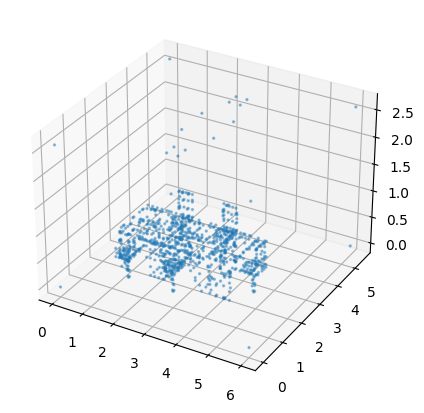

In [17]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1']['layout'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [23]:
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    layout = auto()


In [41]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list_dict = {part.name:[] for part in OfficePart}
    for officename in df_main["office"]:
        for key, pc_list in pc_list_dict.items():
            pc_list.append(pointCloud_dict[officename][key])
        
    # make input-Dictionary and to ND-Array
    input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
    for key, pc_list in pc_list_dict.items():
        pc_array = np.array(pc_list)
    
        if standardize_pointCloud:
            pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
        input_dict[f"pointCloud_{key}"] = pc_array
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [42]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [43]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [44]:
y_sample

case_name
office6_0_246_aout      0
office5_660_0           1
office15_960_82_aout    0
office4_660_82_bout     2
office2_360_246_aout    0
                       ..
office10_0_246_bout     3
office4_360_82_bout     2
office1_960_246_aout    0
office15_660_82_aout    2
office6_960_0           2
Name: countTimeMean_bin, Length: 431, dtype: int64

In [45]:
y_sample.nunique()

4

In [160]:
from data_test import standardization_test

# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(column_name, X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        X = value
        
        standardization_test(key, X)
        
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud_aircon
(431, 580, 3) -5.2803705e-07 0.9999999
pointCloud_airvent
(431, 8, 3) -1.05472104e-07 0.99999994
pointCloud_body
(431, 2048, 3) 1.0649778e-07 0.99999994
pointCloud_layout
(431, 1024, 3) -2.997058e-07 0.9999999


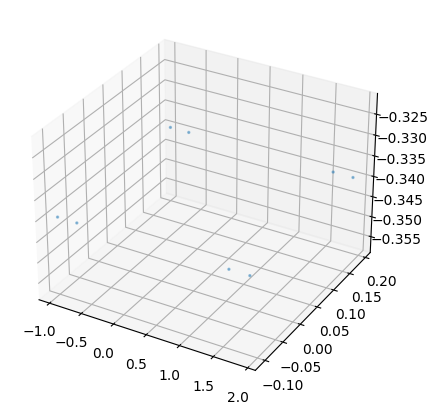

In [114]:
plot3d_points(X_dict_sample["pointCloud_airvent"][2, :,:])

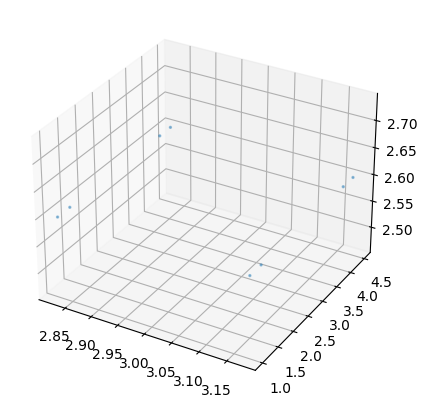

In [108]:
plot3d_points(pointCloud_dict["office1"]["airvent"])

# チューニング

In [55]:
total_office_list = list(df_total["office"].unique())
# office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

total_office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [56]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office28']

In [57]:
idealOffice_list = []

for office in total_office_list:
    df_office = df_total[df_total["office"]==office]
    if df_office["countTimeMean_bin"].nunique() == 4:
        idealOffice_list.append(office)
        

office_list = idealOffice_list
office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office16',
 'office7',
 'office10',
 'office28',
 'office5']

In [58]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11738128026000227287
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9954328576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1828385839982619036
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-28 02:05:27.137895: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 02:05:27.625498: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9493 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [59]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [60]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str):
        
    hp_conv_layers = trial.suggest_int(f'conv_layers_{suffix}', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [61]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification_4pn_countTimeMean_ideal_accObjective.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key[:10] == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc, suffix=key[11:]))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    acc_min_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        acc_min = np.min(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        acc_min_list.append(acc_min)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), acc_min)

    #交差検証の結果の平均値を目的関数
    return np.mean(acc_min_list)#, np.mean(mse_min_list)


db_path

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/mnt/MachineLearning/OptunaLog/classification_4pn_countTimeMean_ideal_accObjective.db'

In [ ]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in idealOffice_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',#'minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


test_office: office1


[I 2022-12-28 02:11:35,576] A new study created in RDB with name: office1_is_test


*** clear_session() occured ! ***


2022-12-28 02:11:35.814889: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9493 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6
2022-12-28 02:11:39.793284: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2022-12-28 02:11:40.556913: I tensorflow/stream_executor/cuda/cuda_blas.cc:1804] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-28 02:11:53,858] Trial 0 finished with value: 0.14285714458674192 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'units-2': 128, 'lr': 0.0013221535794092926, 'batch_size': 64}. Best is trial 0 with value: 0.14285714458674192.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:12:21,426] Trial 1 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'units-2': 320, 'lr': 4.2844420903068094e-05, 'batch_size': 4}. Best is trial 0 with value: 0.14285714458674192.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:12:53,959] Trial 2 finished with value: 0.12500000093132257 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'lr': 0.00028742723729928654, 'batch_size': 4}. Best is trial 0 with value: 0.14285714458674192.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:13:19,592] Trial 3 finished with value: 0.16964285913854837 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 64, 'lr': 3.5432170655809744e-05, 'batch_size': 4}. Best is trial 3 with value: 0.16964285913854837.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 02:13:38,720] Trial 4 finished with value: 0.09821429010480642 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 0.00022611838694695002, 'batch_size': 16}. Best is trial 3 with value: 0.16964285913854837.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:15:02,418] Trial 5 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 128, 'lr': 2.0757622389028544e-05, 'batch_size': 1}. Best is trial 3 with value: 0.16964285913854837.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:15:17,841] Trial 6 finished with value: 0.18750000279396772 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.0003490569576120558, 'batch_size': 32}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:15:42,633] Trial 7 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'lr': 0.014350524211640053, 'batch_size': 16}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:18:08,633] Trial 8 finished with value: 0.08928571734577417 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.001043454791634351, 'batch_size': 1}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548


[I 2022-12-28 02:18:21,769] Trial 9 finished with value: 0.11607143376022577 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.0005024587310841076, 'batch_size': 128}. Best is trial 6 with value: 0.18750000279396772.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:18:41,159] Trial 10 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'lr': 0.002744354955156627, 'batch_size': 32}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:18:59,033] Trial 11 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'lr': 0.0009311384838817811, 'batch_size': 128}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:20:04,566] Trial 12 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 192, 'lr': 0.0025585325604304764, 'batch_size': 1}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:20:36,768] Trial 13 finished with value: 0.16964285913854837 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'units-2': 512, 'units-3': 512, 'lr': 1.3145420220517654e-05, 'batch_size': 4}. Best is trial 6 with value: 0.18750000279396772.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:21:01,866] Trial 14 finished with value: 0.19642857182770967 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'lr': 0.0061770357426686505, 'batch_size': 4}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:21:19,675] Trial 15 finished with value: 0.12500000279396772 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0008338361529410857, 'batch_size': 32}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:21:37,825] Trial 16 finished with value: 0.12500000186264515 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.001294030759223718, 'batch_size': 128}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:21:53,866] Trial 17 finished with value: 0.15178571920841932 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 1.0394568671247005e-05, 'batch_size': 64}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:22:14,235] Trial 18 finished with value: 0.09821428824216127 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.0001275679499018077, 'batch_size': 32}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:22:34,576] Trial 19 finished with value: 0.18750000279396772 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 0, 'lr': 0.00016140391466713935, 'batch_size': 4}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:22:53,725] Trial 20 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'lr': 0.01100857389281514, 'batch_size': 128}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096


[I 2022-12-28 02:23:22,321] Trial 21 finished with value: 0.16964286286383867 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.016766543509108226, 'batch_size': 32}. Best is trial 14 with value: 0.19642857182770967.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:23:40,685] Trial 22 finished with value: 0.08928571734577417 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 320, 'lr': 9.717592932355755e-05, 'batch_size': 16}. Best is trial 14 with value: 0.19642857182770967.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:24:04,300] Trial 23 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 0.005119095044042694, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:24:21,859] Trial 24 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'units-2': 192, 'units-3': 320, 'lr': 0.004069945376196742, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:24:42,251] Trial 25 finished with value: 0.12500000279396772 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'lr': 0.0009237329139444936, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:24:59,467] Trial 26 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.005525369695404688, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:25:15,736] Trial 27 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.00045184340475548255, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:25:31,976] Trial 28 finished with value: 0.12500000279396772 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.00039360723114661745, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:25:49,035] Trial 29 finished with value: 0.14285714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.07960947411289117, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:26:57,685] Trial 30 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 64, 'lr': 0.0033490061930035995, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:27:15,326] Trial 31 finished with value: 0.09821429010480642 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 32, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'lr': 0.0005365658048945875, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:27:26,777] Trial 32 finished with value: 0.27678571082651615 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.001308773732114474, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:27:45,502] Trial 33 finished with value: 0.13392857369035482 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 0.0001226108465636029, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:28:02,235] Trial 34 finished with value: 0.20535714458674192 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 448, 'lr': 0.00010325404342793148, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 02:28:24,078] Trial 35 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 256, 'lr': 0.00021883238173618758, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:28:41,368] Trial 36 finished with value: 0.0714285746216774 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.0003456633049453175, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 02:29:01,928] Trial 37 finished with value: 0.19642857275903225 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.04154804346786388, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:29:26,837] Trial 38 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'units-2': 256, 'lr': 7.596949112791693e-05, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:30:59,311] Trial 39 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.00016660780388512826, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:31:17,303] Trial 40 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.004478085142287932, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:32:19,245] Trial 41 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.00013042610886109196, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:33:52,904] Trial 42 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 256, 'units-3': 128, 'lr': 0.00046437440659983234, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:34:08,413] Trial 43 finished with value: 0.2589285681024194 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'units-2': 320, 'units-3': 320, 'lr': 6.274668180167054e-05, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:34:27,545] Trial 44 finished with value: 0.16964286100119352 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.005169801451137501, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 02:34:48,897] Trial 45 finished with value: 0.12500000465661287 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.00016951682717783435, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 02:35:06,889] Trial 46 finished with value: 0.1875 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 0.00012052062070962484, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:35:27,897] Trial 47 finished with value: 0.10714285913854837 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'lr': 0.03882908027449183, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:35:48,689] Trial 48 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 192, 'lr': 0.0001628067801003133, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:36:12,997] Trial 49 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 512, 'units-3': 64, 'lr': 0.007638429807004799, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:37:35,240] Trial 50 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'lr': 0.00015203996535242788, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:38:01,148] Trial 51 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0394822959583126, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:38:17,923] Trial 52 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 320, 'lr': 0.005710031452640941, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 02:38:40,192] Trial 53 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 320, 'units-3': 128, 'lr': 0.02672471890194066, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:38:57,882] Trial 54 finished with value: 0.18750000465661287 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.07328112880070528, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 02:39:34,490] Trial 55 finished with value: 0.18750000186264515 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 192, 'units-2': 384, 'lr': 0.036386157938649785, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 02:39:57,067] Trial 56 finished with value: 0.17857143469154835 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 512, 'units-3': 448, 'lr': 0.0003705506678988675, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:40:52,708] Trial 57 finished with value: 0.1339285746216774 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 4.031173671639522e-05, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:42:05,453] Trial 58 finished with value: 0.09821429010480642 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 64, 'lr': 0.000457356505350804, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:42:28,560] Trial 59 finished with value: 0.14285714738070965 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 0.07485629034859466, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:42:56,453] Trial 60 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'units-2': 448, 'lr': 0.0017856306859791475, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:43:17,352] Trial 61 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 0.00800734107470709, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 02:43:42,397] Trial 62 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'lr': 0.03530052656150099, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 02:44:22,453] Trial 63 finished with value: 0.21428571548312902 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'units-2': 256, 'lr': 0.02858073997860183, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 02:44:49,153] Trial 64 finished with value: 0.15178571734577417 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.039028607152838374, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:45:10,120] Trial 65 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.00048687611738347297, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:45:29,545] Trial 66 finished with value: 0.09821428917348385 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.0013797838045764264, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:45:59,063] Trial 67 finished with value: 0.18750000465661287 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 512, 'units-2': 448, 'lr': 0.06929075897915002, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:46:23,430] Trial 68 finished with value: 0.27678571082651615 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'lr': 1.1906145560120095e-05, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-28 02:46:45,905] Trial 69 finished with value: 0.1339285708963871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 224, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 96, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.0013522312414847404, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:47:16,779] Trial 70 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'units-2': 128, 'lr': 0.0011192135647839628, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:47:28,838] Trial 71 finished with value: 0.08928571734577417 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 9.96360623177933e-05, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:47:42,371] Trial 72 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.0013476098287882223, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-28 02:48:43,232] Trial 73 finished with value: 0.3214285718277097 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 32, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'lr': 0.026548887715963282, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 02:49:12,130] Trial 74 finished with value: 0.23214286379516125 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.06801488401503883, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:49:28,089] Trial 75 finished with value: 0.0714285746216774 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 512, 'units-2': 64, 'units-3': 448, 'lr': 0.03018985385198525, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:49:43,639] Trial 76 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'units-2': 448, 'units-3': 448, 'lr': 0.0017524429168321786, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 02:50:03,147] Trial 77 finished with value: 0.17857143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 128, 'lr': 0.0269988144764781, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 02:50:35,739] Trial 78 finished with value: 0.24107143003493547 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.008772403282639205, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:50:53,432] Trial 79 finished with value: 0.09821429010480642 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.0016702504309878251, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:51:19,331] Trial 80 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'units-2': 384, 'units-3': 256, 'lr': 0.0007692611978656912, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:51:40,599] Trial 81 finished with value: 0.13392857369035482 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'lr': 0.012772468286381004, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 02:53:06,175] Trial 82 finished with value: 0.13392857648432255 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0396428087205692, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:53:19,005] Trial 83 finished with value: 0.1339285746216774 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 1.085396315073815e-05, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:53:38,909] Trial 84 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'units-2': 256, 'lr': 0.00011475001658167124, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 02:53:58,867] Trial 85 finished with value: 0.10714285913854837 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'lr': 0.00042436161734197826, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:54:16,825] Trial 86 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 128, 'lr': 0.010847372774727568, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:54:43,816] Trial 87 finished with value: 0.08035714458674192 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 1.173162261187764e-05, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:56:20,875] Trial 88 finished with value: 0.1071428619325161 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 64, 'units-2': 192, 'lr': 0.004785240885502765, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 02:56:45,075] Trial 89 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 7.103971844282895e-05, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:56:56,518] Trial 90 finished with value: 0.19642856996506453 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'units-2': 192, 'lr': 1.9849294512818e-05, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:57:20,368] Trial 91 finished with value: 0.08928571734577417 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.00032869235495756335, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:57:45,093] Trial 92 finished with value: 0.16964285913854837 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 64, 'units-3': 128, 'lr': 0.00026776616798792604, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:58:00,535] Trial 93 finished with value: 0.09821428917348385 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 2.3348896297813408e-05, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 02:58:20,793] Trial 94 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'units-2': 512, 'lr': 9.698027287622441e-05, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 02:58:42,326] Trial 95 finished with value: 0.19642856996506453 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 160, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'units-2': 320, 'units-3': 448, 'lr': 5.956395110453356e-05, 'batch_size': 64}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:59:02,012] Trial 96 finished with value: 0.16071428637951612 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'units-2': 192, 'units-3': 512, 'lr': 0.0001256525937342893, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:59:23,962] Trial 97 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'lr': 5.029154183051171e-05, 'batch_size': 32}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 02:59:43,027] Trial 98 finished with value: 0.0714285746216774 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 1.6760363568712966e-05, 'batch_size': 16}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 03:00:09,685] Trial 99 finished with value: 0.25892857275903225 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'lr': 0.004851531250256672, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25


[I 2022-12-28 03:00:10,080] Using an existing study with name 'office1_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:00:34,432] Trial 100 finished with value: 0.3035714225843549 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.051225608214064744, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:01:01,228] Trial 101 finished with value: 0.2857142882421613 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.016590701491821964, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 03:01:24,636] Trial 102 finished with value: 0.3035714300349355 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.021249138726201697, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 03:01:52,128] Trial 103 finished with value: 0.15178571920841932 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.01852006188212292, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 03:02:18,479] Trial 104 finished with value: 0.26785714738070965 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.05212196202719848, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 03:02:44,471] Trial 105 finished with value: 0.15178571548312902 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.02117114400475117, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-28 03:03:08,497] Trial 106 finished with value: 0.27678571827709675 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 0.051289642642430903, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:03:30,854] Trial 107 finished with value: 0.13392857182770967 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 0.049991410277945826, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-28 03:03:57,304] Trial 108 finished with value: 0.20535714458674192 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 0.05502608078677687, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-28 03:04:23,138] Trial 109 finished with value: 0.24107143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.0878353286864191, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:04:42,988] Trial 110 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 0.0035252970026517076, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-28 03:05:06,338] Trial 111 finished with value: 0.2946428554132581 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.09744595724892867, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 03:05:28,575] Trial 112 finished with value: 0.24107142630964518 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.053795905329529686, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:06:00,531] Trial 113 finished with value: 0.3035714291036129 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.01601203242322148, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 03:06:32,606] Trial 114 finished with value: 0.21428571362048388 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.02354824083588634, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:06:53,765] Trial 115 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.09568453440488828, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:07:22,115] Trial 116 finished with value: 0.2500000046566129 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.01675372049526051, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 03:07:45,215] Trial 117 finished with value: 0.22321428451687098 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.013305934138447831, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:08:06,574] Trial 118 finished with value: 0.19642856996506453 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.0021926505652808143, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 03:08:32,824] Trial 119 finished with value: 0.15178571548312902 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.04703101131010395, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:08:54,283] Trial 120 finished with value: 0.19642856996506453 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 0.0006719775712620745, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 03:09:20,100] Trial 121 finished with value: 0.23214286100119352 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.058542096839122336, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:09:40,325] Trial 122 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.006948482038713124, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:10:01,367] Trial 123 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.010641079051420073, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:10:16,217] Trial 124 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.022288782603114676, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:10:44,592] Trial 125 finished with value: 0.17857143376022577 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.032313073034005386, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:11:05,401] Trial 126 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.015758868793355904, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:11:19,885] Trial 127 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.02027808154736215, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 03:11:46,767] Trial 128 finished with value: 0.10714286100119352 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'lr': 0.04591824680450265, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5


[I 2022-12-28 03:12:11,710] Trial 129 finished with value: 0.18750000279396772 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 2.9451059065028662e-05, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:12:26,478] Trial 130 finished with value: 0.16071428637951612 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 0.06142415027508822, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 03:12:48,094] Trial 131 finished with value: 0.11607143189758062 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.014327863169803499, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:13:15,820] Trial 132 finished with value: 0.3303571389988065 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.016440843341864724, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 03:13:40,736] Trial 133 finished with value: 0.13392857369035482 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'lr': 0.024762323681637343, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 03:14:03,981] Trial 134 finished with value: 0.2767857136204839 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'lr': 0.009901408942499069, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:14:27,737] Trial 135 finished with value: 0.20535714086145163 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'lr': 0.010966939683417344, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:14:51,463] Trial 136 finished with value: 0.12500000279396772 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'lr': 0.008193924784672521, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:15:12,872] Trial 137 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'lr': 0.0026159505221796135, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 03:15:36,897] Trial 138 finished with value: 0.16964285913854837 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.009461191434216618, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 03:16:10,922] Trial 139 finished with value: 0.19642857275903225 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'lr': 0.018646359738549743, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:16:37,590] Trial 140 finished with value: 0.20535714644938707 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'lr': 0.03384894877486929, 'batch_size': 4}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:16:53,547] Trial 141 finished with value: 0.08035714644938707 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.0035111692433031166, 'batch_size': 128}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:17:46,415] Trial 142 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'lr': 0.006115188981319422, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-28 03:18:37,566] Trial 143 finished with value: 0.3482142807915807 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.006252904489064769, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 03:19:43,317] Trial 144 finished with value: 0.2678571464493871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.012168793566846997, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:20:35,701] Trial 145 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'lr': 0.005583790538319272, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:21:34,194] Trial 146 finished with value: 0.3035714300349355 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006709185640747409, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:22:26,294] Trial 147 finished with value: 0.3392857061699033 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006274879329875943, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:23:39,446] Trial 148 finished with value: 0.3482142807915807 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006373757522738294, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 03:24:33,730] Trial 149 finished with value: 0.2678571464493871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006735531470370464, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:25:25,865] Trial 150 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00410635307754895, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:26:18,114] Trial 151 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.005946498932069076, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:27:11,140] Trial 152 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0041799937248104355, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:28:03,532] Trial 153 finished with value: 0.2857142826542258 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0037704087558997654, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:28:55,533] Trial 154 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004239150408728556, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 03:30:20,967] Trial 155 finished with value: 0.23214285634458065 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006252385214256772, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 03:31:12,309] Trial 156 finished with value: 0.2767857136204839 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.003042699377145926, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 03:32:03,860] Trial 157 finished with value: 0.285714284516871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0046484122825965635, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:32:56,285] Trial 158 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004245666065563344, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:33:56,895] Trial 159 finished with value: 0.19642857369035482 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.006376620207906088, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 03:35:28,801] Trial 160 finished with value: 0.2767857126891613 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.007740051700614492, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:36:20,253] Trial 161 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.005587236931895128, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 03:37:37,387] Trial 162 finished with value: 0.12500000465661287 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0088587347290853, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 03:38:27,938] Trial 163 finished with value: 0.19642857182770967 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0022414900343501994, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:39:22,372] Trial 164 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0029689538128149736, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:40:12,966] Trial 165 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004314451183642519, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:41:04,557] Trial 166 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004260121512063084, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:41:57,086] Trial 167 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004112345770611656, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:42:58,741] Trial 168 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.003931979167720565, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:43:50,300] Trial 169 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00497253845479876, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 03:44:42,046] Trial 170 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.005130460050954611, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:45:32,810] Trial 171 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.005074158064858739, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:46:26,394] Trial 172 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00502199698849635, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:47:19,086] Trial 173 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004586724704701157, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 03:48:18,062] Trial 174 finished with value: 0.2946428554132581 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.005341887430735932, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:49:10,655] Trial 175 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0035280695234994348, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:50:03,380] Trial 176 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0032673469372172343, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:50:55,823] Trial 177 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.003266592798912611, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:51:47,557] Trial 178 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.003431225835234692, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:52:40,108] Trial 179 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0021817393948466426, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:53:33,768] Trial 180 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0031052816048204907, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 03:54:26,609] Trial 181 finished with value: 0.285714284516871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0030233161662416284, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:55:19,201] Trial 182 finished with value: 0.2767857098951936 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0020813118552694093, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:56:20,002] Trial 183 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0036292671451473493, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:57:28,194] Trial 184 finished with value: 0.23214285727590322 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.004195346563408316, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 03:58:21,670] Trial 185 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00341468847062648, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 03:59:13,438] Trial 186 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.0028230137740093636, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:00:06,113] Trial 187 finished with value: 0.285714284516871 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.002502772173694284, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:00:58,930] Trial 188 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.00357761440498187, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:01:51,764] Trial 189 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0034584404678850043, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:02:42,473] Trial 190 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.004876697842890325, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:03:35,199] Trial 191 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.004773982399390317, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:04:28,733] Trial 192 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.003998964256497929, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 04:05:20,487] Trial 193 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0040150020098989915, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:06:11,359] Trial 194 finished with value: 0.2857142826542258 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.004169399942194467, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:07:03,210] Trial 195 finished with value: 0.3660714225843549 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.002521304241633431, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:08:03,852] Trial 196 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.0023658707513104942, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 04:08:56,495] Trial 197 finished with value: 0.22321428451687098 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 448, 'lr': 0.0016919352139794772, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:09:49,137] Trial 198 finished with value: 0.24999999906867743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.003133987937484452, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 04:10:42,021] Trial 199 finished with value: 0.2678571427240968 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 384, 'lr': 0.003409380417431733, 'batch_size': 1}. Best is trial 23 with value: 0.3660714225843549.


(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 04:10:42,576] A new study created in RDB with name: office7_is_test


test_office: office7
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 04:11:02,983] Trial 0 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 128, 'lr': 0.00012212450587514222, 'batch_size': 32}. Best is trial 0 with value: 0.0931776575744152.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:11:18,679] Trial 1 finished with value: 0.1735347956418991 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 128, 'lr': 2.1398599032087982e-05, 'batch_size': 16}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:11:37,414] Trial 2 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 0.08337078049489272, 'batch_size': 32}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:11:57,239] Trial 3 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.0008815476400580495, 'batch_size': 128}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:12:56,947] Trial 4 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 384, 'units-3': 384, 'lr': 6.134396568680565e-05, 'batch_size': 1}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:13:15,232] Trial 5 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 128, 'units-2': 384, 'lr': 0.006300857090783344, 'batch_size': 128}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:14:23,331] Trial 6 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 448, 'units-3': 256, 'lr': 0.0012640139509269292, 'batch_size': 1}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:14:47,757] Trial 7 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'units-2': 256, 'lr': 0.0002546928749389668, 'batch_size': 32}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:15:19,423] Trial 8 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 64, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'lr': 0.001053714886163927, 'batch_size': 4}. Best is trial 1 with value: 0.1735347956418991.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 04:15:56,523] Trial 9 finished with value: 0.0959249110892415 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'units-2': 64, 'lr': 0.030503292341153128, 'batch_size': 4}. Best is trial 1 with value: 0.1735347956418991.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:16:16,917] Trial 10 finished with value: 0.20032050926238298 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 8.191958286616584e-05, 'batch_size': 16}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:17:27,060] Trial 11 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 0.014518723231530415, 'batch_size': 1}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:17:45,325] Trial 12 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'lr': 0.0002541874322648063, 'batch_size': 32}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 04:18:04,459] Trial 13 finished with value: 0.14674908760935068 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 192, 'lr': 0.04126924155610898, 'batch_size': 32}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:18:25,309] Trial 14 finished with value: 0.1673534819856286 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.04455060255472156, 'batch_size': 16}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:19:00,193] Trial 15 finished with value: 0.12889194302260876 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 384, 'lr': 0.06516631743825864, 'batch_size': 4}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 04:19:22,603] Trial 16 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 128, 'units-3': 256, 'lr': 0.07261834217862415, 'batch_size': 128}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:19:38,368] Trial 17 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 0.0015121529978001497, 'batch_size': 64}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-28 04:19:57,662] Trial 18 finished with value: 0.06387362908571959 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0007294493848659811, 'batch_size': 128}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:20:12,094] Trial 19 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.010457922892873605, 'batch_size': 128}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:20:24,861] Trial 20 finished with value: 0.16597985662519932 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.00021890614601348057, 'batch_size': 128}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:21:57,430] Trial 21 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 192, 'lr': 0.0004340130279625493, 'batch_size': 1}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:22:18,940] Trial 22 finished with value: 0.11240842845290899 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'lr': 0.0011910696078021898, 'batch_size': 128}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:22:46,559] Trial 23 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.0015279852150581546, 'batch_size': 32}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:23:14,309] Trial 24 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 320, 'units-3': 384, 'lr': 3.3137539005207205e-05, 'batch_size': 32}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-28 04:23:48,294] Trial 25 finished with value: 0.05494505725800991 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 64, 'lr': 0.00014067030093724194, 'batch_size': 4}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:24:08,117] Trial 26 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 64, 'units-2': 512, 'lr': 2.115073038828692e-05, 'batch_size': 16}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:24:23,935] Trial 27 finished with value: 0.10210622940212488 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 512, 'lr': 1.2606541085005686e-05, 'batch_size': 64}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 04:25:01,102] Trial 28 finished with value: 0.09317765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.003560283692498009, 'batch_size': 4}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:25:20,444] Trial 29 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.00021835207999141367, 'batch_size': 16}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:26:49,480] Trial 30 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 320, 'units-2': 512, 'units-3': 384, 'lr': 0.00015249657313115415, 'batch_size': 1}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:27:15,005] Trial 31 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'lr': 0.00011912455799696675, 'batch_size': 64}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:27:37,955] Trial 32 finished with value: 0.08424908574670553 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 2.0201142396812886e-05, 'batch_size': 4}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:28:45,673] Trial 33 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 320, 'lr': 0.025033022450949353, 'batch_size': 1}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:29:06,874] Trial 34 finished with value: 0.11996337026357651 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.0001436235679077116, 'batch_size': 32}. Best is trial 10 with value: 0.20032050926238298.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-28 04:29:30,359] Trial 35 finished with value: 0.20924908481538296 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 192, 'units-2': 256, 'lr': 1.2565888814552283e-05, 'batch_size': 16}. Best is trial 35 with value: 0.20924908481538296.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 04:29:48,358] Trial 36 finished with value: 0.21199633553624153 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.0002099604560029819, 'batch_size': 64}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 04:30:56,136] Trial 37 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 448, 'units-2': 256, 'units-3': 448, 'lr': 0.01652774825467505, 'batch_size': 1}. Best is trial 36 with value: 0.21199633553624153.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:31:22,568] Trial 38 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.0076522445226219525, 'batch_size': 128}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 04:31:50,202] Trial 39 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'lr': 0.07895552976474451, 'batch_size': 16}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:32:14,111] Trial 40 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.000291008586837509, 'batch_size': 32}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:32:35,936] Trial 41 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0012060484060709817, 'batch_size': 32}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:32:56,546] Trial 42 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 512, 'units-3': 512, 'lr': 4.801707169696528e-05, 'batch_size': 128}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:33:26,088] Trial 43 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 128, 'lr': 0.001222949193027926, 'batch_size': 4}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:34:07,971] Trial 44 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'units-2': 192, 'lr': 6.779736591081023e-05, 'batch_size': 4}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:34:24,179] Trial 45 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0028970292757726232, 'batch_size': 16}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:34:51,013] Trial 46 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.0002268301322879145, 'batch_size': 4}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 04:35:10,213] Trial 47 finished with value: 0.17742674238979816 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.03145782142801143, 'batch_size': 16}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:36:18,581] Trial 48 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 256, 'units-3': 128, 'lr': 6.791444107811393e-05, 'batch_size': 1}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:36:35,598] Trial 49 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.038997555802252365, 'batch_size': 64}. Best is trial 36 with value: 0.21199633553624153.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 04:36:51,056] Trial 50 finished with value: 0.26442308723926544 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'lr': 0.05719244810199515, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:37:12,740] Trial 51 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 320, 'lr': 0.0013964013655006762, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:37:34,732] Trial 52 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'units-2': 320, 'units-3': 512, 'lr': 2.492201573888676e-05, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:37:51,924] Trial 53 finished with value: 0.14674908574670553 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 8.437366277870484e-05, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:38:09,633] Trial 54 finished with value: 0.06639194395393133 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'lr': 0.0026694387635291853, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:38:25,816] Trial 55 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'units-1': 512, 'units-2': 64, 'lr': 0.0004991746868842987, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:38:45,960] Trial 56 finished with value: 0.0959249110892415 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'filters_aircon-2': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'units-2': 128, 'lr': 0.004582775888037361, 'batch_size': 16}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:40:23,511] Trial 57 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 96, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 0.004862006609059413, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:40:43,018] Trial 58 finished with value: 0.15201465506106615 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'units-2': 448, 'lr': 0.0364004956079888, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:41:02,469] Trial 59 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.0003992267290488623, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0357142873108387


[I 2022-12-28 04:42:46,229] Trial 60 finished with value: 0.08699633926153183 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0002245661873793978, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 04:43:12,604] Trial 61 finished with value: 0.11996337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'units-3': 128, 'lr': 0.00015225565063539106, 'batch_size': 16}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:43:27,455] Trial 62 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 64, 'lr': 0.00016291677331434231, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 04:43:57,263] Trial 63 finished with value: 0.07921245601028204 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 192, 'lr': 1.0329437844120946e-05, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:44:23,815] Trial 64 finished with value: 0.11996337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.07542195598056234, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:44:41,006] Trial 65 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'units-2': 192, 'units-3': 320, 'lr': 0.0017157649835796791, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:45:04,155] Trial 66 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 512, 'lr': 0.07590516364378776, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:45:19,139] Trial 67 finished with value: 0.21199633460491896 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'units-2': 256, 'units-3': 448, 'lr': 1.1772991248178893e-05, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:45:44,306] Trial 68 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 192, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'lr': 9.697558889429482e-05, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 04:46:50,549] Trial 69 finished with value: 0.12271062564104795 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 2.1989417813904404e-05, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:47:10,890] Trial 70 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.002002252458321719, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:47:35,732] Trial 71 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'lr': 1.6076239147974173e-05, 'batch_size': 16}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:47:53,900] Trial 72 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'lr': 0.011927540676662221, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:49:29,651] Trial 73 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 64, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'units-2': 192, 'lr': 0.0010532898173544543, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:49:49,326] Trial 74 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 320, 'lr': 1.2731384912317747e-05, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 04:51:12,086] Trial 75 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.0011592788148419284, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 04:51:52,087] Trial 76 finished with value: 0.17880037147551775 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'lr': 0.007393417742741364, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 04:52:15,179] Trial 77 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 0.000976278878653453, 'batch_size': 16}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:53:18,738] Trial 78 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 256, 'units-2': 64, 'lr': 0.02366144120370786, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:53:40,223] Trial 79 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 320, 'lr': 0.007079032539024145, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:54:28,823] Trial 80 finished with value: 0.20306776836514473 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 192, 'units-2': 192, 'lr': 0.014595447765783006, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:54:48,323] Trial 81 finished with value: 0.07532051485031843 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.0004493987922817682, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:55:01,424] Trial 82 finished with value: 0.0959249110892415 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 0.0016809755559278865, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 04:55:21,881] Trial 83 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.8337652836809918e-05, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:55:36,789] Trial 84 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 4.8585209343889835e-05, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 04:55:53,672] Trial 85 finished with value: 0.21199633367359638 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 320, 'lr': 0.000419752239464128, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 04:56:35,273] Trial 86 finished with value: 0.21817765478044748 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.061874298835512306, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:56:55,832] Trial 87 finished with value: 0.11378205381333828 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 512, 'units-2': 64, 'lr': 0.00048757896501663606, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:57:29,840] Trial 88 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 448, 'units-3': 256, 'lr': 0.00014406592015516872, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:57:50,257] Trial 89 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 512, 'lr': 0.009835228740534632, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:58:16,432] Trial 90 finished with value: 0.08951465506106615 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 224, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.07204406419104559, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:58:36,966] Trial 91 finished with value: 0.11240842845290899 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'lr': 5.337443360972682e-05, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 04:58:54,566] Trial 92 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'lr': 0.0025621807708696835, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 04:59:16,970] Trial 93 finished with value: 0.04853480029851198 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.00032311606448381263, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 04:59:37,458] Trial 94 finished with value: 0.17353479750454426 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 64, 'lr': 0.00011865507680538443, 'batch_size': 32}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 05:00:43,228] Trial 95 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'lr': 4.689452577883451e-05, 'batch_size': 1}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0


[I 2022-12-28 05:01:00,183] Trial 96 finished with value: 0.03960622847080231 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'lr': 0.007430239091572857, 'batch_size': 64}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 05:01:20,359] Trial 97 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.007946412146835304, 'batch_size': 16}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:02:02,509] Trial 98 finished with value: 0.22092491388320923 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.045850358240764, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:02:23,994] Trial 99 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 64, 'lr': 0.0005425215530073574, 'batch_size': 128}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 05:02:24,394] Using an existing study with name 'office7_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:03:09,872] Trial 100 finished with value: 0.25434982404112816 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05478331862134046, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:03:45,895] Trial 101 finished with value: 0.25549451261758804 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.054962671745793175, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:04:24,245] Trial 102 finished with value: 0.18131868727505207 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.020066221652331784, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:04:54,420] Trial 103 finished with value: 0.20032051298767328 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.08896207950295736, 'batch_size': 4}. Best is trial 50 with value: 0.26442308723926544.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:05:32,854] Trial 104 finished with value: 0.27220696583390236 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05072593336998822, 'batch_size': 4}. Best is trial 104 with value: 0.27220696583390236.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:06:09,470] Trial 105 finished with value: 0.23878205567598343 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.052420867996325456, 'batch_size': 4}. Best is trial 104 with value: 0.27220696583390236.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516


[I 2022-12-28 05:06:41,888] Trial 106 finished with value: 0.22092491015791893 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.044943735655141, 'batch_size': 4}. Best is trial 104 with value: 0.27220696583390236.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:07:16,628] Trial 107 finished with value: 0.2440476231276989 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05130017580324713, 'batch_size': 4}. Best is trial 104 with value: 0.27220696583390236.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3589743673801422
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:07:54,054] Trial 108 finished with value: 0.29510073363780975 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05702334386017156, 'batch_size': 4}. Best is trial 108 with value: 0.29510073363780975.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:08:28,147] Trial 109 finished with value: 0.29899267852306366 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.051434431241986676, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:09:11,205] Trial 110 finished with value: 0.29899267479777336 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.054899703462181676, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:09:50,024] Trial 111 finished with value: 0.23374542593955994 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.049693625263904265, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:10:27,719] Trial 112 finished with value: 0.2836538515985012 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05327100010260746, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:11:02,844] Trial 113 finished with value: 0.20924908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05105912753292134, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:11:40,911] Trial 114 finished with value: 0.28113553300499916 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05755253683559014, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:12:16,437] Trial 115 finished with value: 0.24771063029766083 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05732679440493384, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:12:51,305] Trial 116 finished with value: 0.2719780243933201 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.058411038929589904, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 05:13:28,666] Trial 117 finished with value: 0.12889194395393133 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.09981328925346669, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:14:07,106] Trial 118 finished with value: 0.22092491388320923 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.03300347001417966, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:14:40,714] Trial 119 finished with value: 0.2696886481717229 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06073540481404234, 'batch_size': 4}. Best is trial 109 with value: 0.29899267852306366.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:15:14,481] Trial 120 finished with value: 0.30792124941945076 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.06370601414052389, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:15:47,839] Trial 121 finished with value: 0.29006410762667656 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.06157191669182856, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:16:24,324] Trial 122 finished with value: 0.1684981733560562 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.028175623456925012, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968


[I 2022-12-28 05:16:59,144] Trial 123 finished with value: 0.21062271110713482 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.037802602969169034, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:17:31,400] Trial 124 finished with value: 0.27335165813565254 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.06378000847032396, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 05:18:10,910] Trial 125 finished with value: 0.23763736709952354 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.06399388916814999, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 05:18:43,867] Trial 126 finished with value: 0.27335165068507195 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.08419709278993132, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 05:19:18,993] Trial 127 finished with value: 0.13782051857560873 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.09799656079397859, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:19:53,359] Trial 128 finished with value: 0.19139194209128618 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.08404095744978082, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 05:20:30,502] Trial 129 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.03933815603409697, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:21:00,919] Trial 130 finished with value: 0.20924908574670553 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.06748776331319592, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:21:34,720] Trial 131 finished with value: 0.16849816963076591 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.02453760704399868, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 05:22:12,693] Trial 132 finished with value: 0.09317765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.031935650837794614, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:22:48,327] Trial 133 finished with value: 0.20924908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.06565923038132822, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:23:25,953] Trial 134 finished with value: 0.22229854203760624 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.038842180800771696, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:24:02,004] Trial 135 finished with value: 0.2925824224948883 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07645491039385861, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:24:44,021] Trial 136 finished with value: 0.24381868541240692 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07848204700240749, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 05:25:26,564] Trial 137 finished with value: 0.22710622567683458 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.08773355880975464, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:26:02,488] Trial 138 finished with value: 0.17353480029851198 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.04363541328758073, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:26:38,223] Trial 139 finished with value: 0.24771062657237053 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.06554842364392434, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516


[I 2022-12-28 05:27:12,733] Trial 140 finished with value: 0.1684981733560562 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.019290620711276317, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:27:49,989] Trial 141 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.0588300919685717, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:28:20,665] Trial 142 finished with value: 0.27335165813565254 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07982402559782517, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:28:55,582] Trial 143 finished with value: 0.20924908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0777549844072223, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 05:29:33,972] Trial 144 finished with value: 0.11996337492018938 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.09949540077884927, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:30:10,415] Trial 145 finished with value: 0.17353480588644743 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.028844219760070663, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.4615384638309479
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:30:56,008] Trial 146 finished with value: 0.28502747416496277 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.043493621323013675, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:31:29,917] Trial 147 finished with value: 0.20032051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.0465890822615482, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:32:02,208] Trial 148 finished with value: 0.30792124569416046 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07360028682933531, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:32:35,134] Trial 149 finished with value: 0.27335165068507195 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07087511539781514, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:33:16,292] Trial 150 finished with value: 0.15567765664309263 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07825233431397563, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:33:52,601] Trial 151 finished with value: 0.28113553300499916 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06996861795805863, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:34:26,042] Trial 152 finished with value: 0.3015109971165657 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07133098700269276, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:35:03,118] Trial 153 finished with value: 0.20032051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06977555929264359, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:35:33,435] Trial 154 finished with value: 0.19139194209128618 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.08484963780130722, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:36:10,677] Trial 155 finished with value: 0.20032051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.04233380567262786, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:36:45,469] Trial 156 finished with value: 0.22092491015791893 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.07450884339659737, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:37:18,686] Trial 157 finished with value: 0.21199633739888668 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.03699131207040277, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:37:55,544] Trial 158 finished with value: 0.16460622940212488 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.09819687021027318, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:38:30,314] Trial 159 finished with value: 0.2747252769768238 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0683231966705968, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:39:03,895] Trial 160 finished with value: 0.2454212475568056 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06525758719994883, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:39:44,779] Trial 161 finished with value: 0.27861721999943256 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.046859158077638914, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:40:18,580] Trial 162 finished with value: 0.1978021990507841 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.04773479927591991, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:40:50,604] Trial 163 finished with value: 0.305402934551239 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.05751941236545378, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:41:23,888] Trial 164 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.03287563659411037, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:41:59,447] Trial 165 finished with value: 0.27220696210861206 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.05481928998400761, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25


[I 2022-12-28 05:42:37,708] Trial 166 finished with value: 0.22092491388320923 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.04123878246150715, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:43:12,739] Trial 167 finished with value: 0.21817765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.061289088924670033, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:43:47,931] Trial 168 finished with value: 0.2465659398585558 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.04734534886967619, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:44:21,557] Trial 169 finished with value: 0.29899268224835396 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.0718155379172949, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:44:53,956] Trial 170 finished with value: 0.19139194581657648 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.05343280189409704, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:45:25,400] Trial 171 finished with value: 0.20924908574670553 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07248525515789493, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 05:46:01,100] Trial 172 finished with value: 0.20924908388406038 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.07979887511929092, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:46:37,700] Trial 173 finished with value: 0.28113553300499916 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.061543704867456354, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:47:11,816] Trial 174 finished with value: 0.24771063029766083 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.04299795955926718, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:47:48,035] Trial 175 finished with value: 0.21199634298682213 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.036040743328317366, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:48:21,151] Trial 176 finished with value: 0.18246337492018938 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 96, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05625390126305185, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:48:54,009] Trial 177 finished with value: 0.26327839121222496 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.05957823839361855, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:49:29,611] Trial 178 finished with value: 0.288690485060215 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.06530887835628348, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 05:50:03,902] Trial 179 finished with value: 0.12889194395393133 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.09986277594626315, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:50:41,168] Trial 180 finished with value: 0.22092491202056408 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.028831492126243304, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:51:14,819] Trial 181 finished with value: 0.20032051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.06630782431961896, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:51:49,112] Trial 182 finished with value: 0.23626374453306198 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.047266392111322, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:52:26,437] Trial 183 finished with value: 0.3065476231276989 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0664923715973584, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:53:01,087] Trial 184 finished with value: 0.21062272042036057 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05205977103984178, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 05:53:37,647] Trial 185 finished with value: 0.18246337492018938 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.08524075780093789, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:54:17,463] Trial 186 finished with value: 0.20924908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06928400735158026, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:54:55,039] Trial 187 finished with value: 0.29899267479777336 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.04201678960214659, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:55:27,798] Trial 188 finished with value: 0.22985348477959633 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.03746238220857567, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:56:01,455] Trial 189 finished with value: 0.26579670794308186 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.04720844410350183, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:56:42,922] Trial 190 finished with value: 0.16460623126477003 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.04210601375174987, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 05:57:21,191] Trial 191 finished with value: 0.26442307978868484 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.05666028068794103, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 05:57:57,526] Trial 192 finished with value: 0.26190477050840855 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.06901465423006883, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:58:32,665] Trial 193 finished with value: 0.19139194954186678 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.057315357831706326, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 05:59:11,153] Trial 194 finished with value: 0.16460622940212488 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.08251407874510187, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 05:59:44,088] Trial 195 finished with value: 0.22092491388320923 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.034568205209772225, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 06:00:16,914] Trial 196 finished with value: 0.292582418769598 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.06643895758819293, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 06:00:49,698] Trial 197 finished with value: 0.22985348477959633 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.04988174617239051, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:01:22,140] Trial 198 finished with value: 0.2275641094893217 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.09076597480034788, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office16') 0.25


[I 2022-12-28 06:01:57,242] Trial 199 finished with value: 0.18772894237190485 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.06150560435726912, 'batch_size': 4}. Best is trial 120 with value: 0.30792124941945076.


(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office28') 0.2857142984867096


[I 2022-12-28 06:01:57,683] A new study created in RDB with name: office10_is_test


test_office: office10
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:02:10,343] Trial 0 finished with value: 0.13782051485031843 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 0, 'lr': 0.00015682351831390693, 'batch_size': 128}. Best is trial 0 with value: 0.13782051485031843.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:03:19,549] Trial 1 finished with value: 0.14056776836514473 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 160, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'units-2': 128, 'units-3': 512, 'lr': 1.297680234493067e-05, 'batch_size': 1}. Best is trial 1 with value: 0.14056776836514473.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 06:03:49,466] Trial 2 finished with value: 0.10210622940212488 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 1.4720901339089255e-05, 'batch_size': 4}. Best is trial 1 with value: 0.14056776836514473.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:04:05,332] Trial 3 finished with value: 0.2628205129876733 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'lr': 5.7765058175016406e-05, 'batch_size': 64}. Best is trial 3 with value: 0.2628205129876733.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:05:08,592] Trial 4 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 448, 'units-2': 128, 'lr': 0.024171419822352682, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:05:23,292] Trial 5 finished with value: 0.20032051485031843 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 0.009805578465579367, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 06:06:08,002] Trial 6 finished with value: 0.29235347732901573 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 0.00032083664781435003, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 06:06:24,596] Trial 7 finished with value: 0.30013736337423325 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'lr': 1.0214374188964655e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-28 06:06:44,927] Trial 8 finished with value: 0.19139194209128618 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 0.0027220172437044184, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:07:20,693] Trial 9 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 512, 'units-2': 64, 'units-3': 64, 'lr': 0.007858541809022127, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:08:27,210] Trial 10 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 0.04659450113106939, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:08:51,587] Trial 11 finished with value: 0.2831959673203528 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'units-2': 192, 'units-3': 384, 'lr': 0.0544268589564904, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:09:22,153] Trial 12 finished with value: 0.3431776473298669 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 0.0007012523619950116, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:09:38,623] Trial 13 finished with value: 0.2628205129876733 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.0005556826304455089, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:09:59,996] Trial 14 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'units-3': 128, 'lr': 4.636834856653976e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:10:31,355] Trial 15 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 64, 'units-2': 64, 'lr': 0.07505564556654198, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:11:45,696] Trial 16 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 9.922018354838141e-05, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:12:08,513] Trial 17 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'lr': 0.0584131903056833, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 06:12:26,931] Trial 18 finished with value: 0.2538919420912862 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 96, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.00014379698122849306, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 06:12:46,213] Trial 19 finished with value: 0.2896062219515443 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 128, 'lr': 0.0032384313768444415, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:13:06,554] Trial 20 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'lr': 0.006455660578339783, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:14:27,015] Trial 21 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00039368822601427555, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:14:45,781] Trial 22 finished with value: 0.20306776650249958 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 5.007430825592245e-05, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:15:14,675] Trial 23 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 4.383589605608061e-05, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:15:56,140] Trial 24 finished with value: 0.23878205381333828 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 64, 'units-2': 192, 'lr': 0.006356300636281976, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:16:16,225] Trial 25 finished with value: 0.20032051485031843 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 0, 'lr': 0.0009422815123605809, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:18:07,217] Trial 26 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'lr': 0.00013875033117396419, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:18:36,576] Trial 27 finished with value: 0.19665751047432423 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 8.787202088738389e-05, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:19:01,484] Trial 28 finished with value: 0.24496337119489908 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 128, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.00013342654098279707, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:19:20,094] Trial 29 finished with value: 0.3163919383659959 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 4.7756439523241704e-05, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4642857015132904


[I 2022-12-28 06:19:43,485] Trial 30 finished with value: 0.262820509262383 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 192, 'lr': 1.0786688115006585e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:20:05,935] Trial 31 finished with value: 0.298534800298512 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.07010854339330386, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-28 06:20:20,686] Trial 32 finished with value: 0.18246337492018938 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.022755268995020374, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-28 06:20:57,531] Trial 33 finished with value: 0.2538919420912862 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 192, 'lr': 0.0006866759420715288, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:21:35,869] Trial 34 finished with value: 0.1840659398585558 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 224, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 4.134648171861328e-05, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:22:08,403] Trial 35 finished with value: 0.2806776510551572 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 448, 'lr': 0.001614034649800453, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:22:26,546] Trial 36 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 320, 'units-2': 448, 'units-3': 384, 'lr': 0.07541496154069825, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:22:48,446] Trial 37 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'lr': 0.006012479363601973, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 06:23:05,320] Trial 38 finished with value: 0.3074633711948991 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'units-2': 384, 'units-3': 128, 'lr': 7.871043616247461e-05, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 06:23:24,245] Trial 39 finished with value: 0.2948717959225178 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.03007869922884962, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:23:40,946] Trial 40 finished with value: 0.14674908574670553 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 256, 'lr': 0.023561463325244347, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0


[I 2022-12-28 06:24:04,130] Trial 41 finished with value: 0.2607600726187229 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 1.1104964505262591e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:24:26,897] Trial 42 finished with value: 0.14674908574670553 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 0.00030655331140530637, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:24:49,474] Trial 43 finished with value: 0.36355310725048184 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 256, 'units-3': 512, 'lr': 6.241819786613606e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:26:13,948] Trial 44 finished with value: 0.2859432231634855 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'units-2': 256, 'units-3': 512, 'lr': 1.3900126906807541e-05, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 06:26:33,041] Trial 45 finished with value: 0.21817765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 448, 'lr': 0.000790144372073504, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:27:05,599] Trial 46 finished with value: 0.20558608695864677 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'lr': 0.019777745592514905, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:27:29,075] Trial 47 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'lr': 3.536279668193462e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:27:49,876] Trial 48 finished with value: 0.2896062256768346 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 512, 'units-3': 448, 'lr': 7.29242854262725e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:28:55,410] Trial 49 finished with value: 0.12271062657237053 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'units-3': 64, 'lr': 8.485852783666837e-05, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:29:20,643] Trial 50 finished with value: 0.19413919746875763 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 128, 'lr': 7.215505355776566e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:29:40,268] Trial 51 finished with value: 0.24771062470972538 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 0.0006010213814198807, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:30:01,493] Trial 52 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 448, 'units-2': 320, 'units-3': 320, 'lr': 0.00041876108110008604, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-28 06:30:15,634] Trial 53 finished with value: 0.24771062284708023 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'lr': 1.3332622263343982e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 06:30:33,594] Trial 54 finished with value: 0.26282051112502813 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'lr': 0.009397982033115444, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.25


[I 2022-12-28 06:31:02,868] Trial 55 finished with value: 0.3589743599295616 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.09250860045217398, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:31:21,685] Trial 56 finished with value: 0.30769230239093304 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 256, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.058236303728021896, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:32:26,903] Trial 57 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 256, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 448, 'lr': 0.0014215744359487295, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:32:58,594] Trial 58 finished with value: 0.20032051298767328 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 32, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.00023926933469640556, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.4285714328289032


[I 2022-12-28 06:33:22,628] Trial 59 finished with value: 0.26282051485031843 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 3.906268259155427e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 06:33:55,238] Trial 60 finished with value: 0.2870879117399454 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.0800335340257855, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:34:56,463] Trial 61 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 320, 'lr': 0.005000052149513482, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:35:22,146] Trial 62 finished with value: 0.1978021990507841 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 32, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 320, 'lr': 0.0005429574281061449, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 06:35:42,384] Trial 63 finished with value: 0.2896062294021249 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'units-2': 256, 'units-3': 384, 'lr': 0.019031328658700337, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 06:36:04,365] Trial 64 finished with value: 0.12889194581657648 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.015904115912295062, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:36:24,940] Trial 65 finished with value: 0.1799450572580099 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'units-2': 192, 'lr': 0.007728738876988673, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:36:47,599] Trial 66 finished with value: 0.11103480216115713 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'units-2': 192, 'units-3': 320, 'lr': 0.0004811673529402744, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 06:37:06,532] Trial 67 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.027275274411312167, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:37:24,567] Trial 68 finished with value: 0.36378204822540283 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'lr': 0.0036671461283515885, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:37:42,232] Trial 69 finished with value: 0.11103480216115713 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 224, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 0.00012797066141741464, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:38:07,657] Trial 70 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 512, 'units-2': 192, 'lr': 0.031080336551017433, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:38:28,783] Trial 71 finished with value: 0.12271062657237053 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 320, 'units-3': 448, 'lr': 0.04650488449308369, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:38:44,374] Trial 72 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 0.0009772031403725984, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:40:40,543] Trial 73 finished with value: 0.18521062470972538 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 256, 'filters_layout-2': 96, 'dense_layers': 0, 'lr': 0.0028994860064175754, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:41:06,270] Trial 74 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 128, 'lr': 0.00027826217418674184, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3214285671710968


[I 2022-12-28 06:41:32,261] Trial 75 finished with value: 0.19139194022864103 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 64, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'lr': 0.015231180646298055, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:41:48,752] Trial 76 finished with value: 0.20032051298767328 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.0012361668219604345, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 06:43:11,228] Trial 77 finished with value: 0.09317765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.002003563637647721, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 06:43:35,112] Trial 78 finished with value: 0.2806776622310281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'lr': 1.7440269713589623e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:44:01,055] Trial 79 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0023718857758844394, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:44:14,953] Trial 80 finished with value: 0.22710622381418943 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 2.5167423345768155e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:44:34,421] Trial 81 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 192, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 192, 'units-2': 192, 'units-3': 448, 'lr': 0.038567585471118354, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:45:08,046] Trial 82 finished with value: 0.13782051485031843 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 512, 'units-2': 256, 'units-3': 192, 'lr': 0.0003692728033181318, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:45:34,298] Trial 83 finished with value: 0.2806776547804475 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'lr': 0.00013213621289270353, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1428571492433548


[I 2022-12-28 06:45:50,313] Trial 84 finished with value: 0.10210623126477003 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 0, 'lr': 3.946830087779291e-05, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:46:14,772] Trial 85 finished with value: 0.2628205129876733 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'units-2': 64, 'units-3': 192, 'lr': 0.00036565247811495534, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:46:37,163] Trial 86 finished with value: 0.15842491015791893 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.00015541267506855844, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2857142984867096


[I 2022-12-28 06:47:00,315] Trial 87 finished with value: 0.23878205567598343 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.016929569217586142, 'batch_size': 32}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:47:57,356] Trial 88 finished with value: 0.12271062657237053 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 5.221882758991787e-05, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:49:35,375] Trial 89 finished with value: 0.14674908760935068 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 256, 'units-2': 512, 'units-3': 128, 'lr': 0.00014102104008405217, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-28 06:49:50,674] Trial 90 finished with value: 0.39949633553624153 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 224, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'lr': 8.77944074698262e-05, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 06:50:59,937] Trial 91 finished with value: 0.10989011451601982 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'units-2': 256, 'lr': 0.048692128860013034, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 06:51:24,242] Trial 92 finished with value: 0.18246337492018938 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 128, 'units-3': 384, 'lr': 3.0517023750122162e-05, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:51:43,234] Trial 93 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.006532783748894004, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:52:03,158] Trial 94 finished with value: 0.21817765478044748 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'lr': 5.9258079441111174e-05, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3571428656578064


[I 2022-12-28 06:52:46,377] Trial 95 finished with value: 0.32028388418257236 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 0, 'lr': 0.020270290471491703, 'batch_size': 4}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 06:53:41,444] Trial 96 finished with value: 0.17353479843586683 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 9.463372978949338e-05, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:54:03,429] Trial 97 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 384, 'units-3': 192, 'lr': 0.0005762124345922295, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:54:21,455] Trial 98 finished with value: 0.12271062657237053 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 128, 'units-2': 64, 'lr': 0.015284698403807157, 'batch_size': 64}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:54:45,004] Trial 99 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 256, 'lr': 4.8492361622933634e-05, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 06:54:45,453] Using an existing study with name 'office10_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:55:07,408] Trial 100 finished with value: 0.20306776650249958 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 448, 'units-2': 384, 'lr': 2.213629002779252e-05, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:55:30,013] Trial 101 finished with value: 0.2680860813707113 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.004064477346690177, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.4642857015132904
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:55:50,739] Trial 102 finished with value: 0.2834249045699835 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.0012988353270772185, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:56:10,938] Trial 103 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 384, 'units-3': 64, 'lr': 0.012199527591917619, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.3928571343421936


[I 2022-12-28 06:56:40,197] Trial 104 finished with value: 0.2896062256768346 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'lr': 0.00022844121645025796, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 06:57:01,272] Trial 105 finished with value: 0.26442307978868484 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 192, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 384, 'units-2': 320, 'lr': 3.1129198201317134e-05, 'batch_size': 128}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:57:23,142] Trial 106 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 0.003601784286060603, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:57:46,732] Trial 107 finished with value: 0.33814101852476597 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 0.0001929199872259563, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:58:08,859] Trial 108 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 0.001612711008457639, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:58:30,197] Trial 109 finished with value: 0.31913919001817703 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 384, 'units-3': 256, 'lr': 0.0018038275224688649, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:58:53,991] Trial 110 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0013531116535422092, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 06:59:15,952] Trial 111 finished with value: 0.2923534791916609 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0007826634580818679, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:59:37,585] Trial 112 finished with value: 0.37271061912178993 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 0.0011514089738952, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 06:59:59,335] Trial 113 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0014132840436002069, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:00:21,361] Trial 114 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0013876237752513951, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:00:43,336] Trial 115 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.001361740822722005, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:01:05,445] Trial 116 finished with value: 0.20306776650249958 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0014248218305861864, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:01:27,628] Trial 117 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0024789431875393325, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:01:49,353] Trial 118 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.002212709201803014, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:02:11,312] Trial 119 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0021946028739104734, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:02:33,187] Trial 120 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0022043472965655063, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:02:55,075] Trial 121 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0021725687131629646, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:03:17,162] Trial 122 finished with value: 0.25389194022864103 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0028379015881569453, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:03:39,038] Trial 123 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0017922786226690732, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:04:00,763] Trial 124 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0016305312923705188, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 07:04:22,965] Trial 125 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0016110792734925616, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:04:44,638] Trial 126 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0036173676477272566, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:05:06,680] Trial 127 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 512, 'lr': 0.0010393560576866365, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:05:28,739] Trial 128 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 512, 'lr': 0.004153725908692041, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:05:51,148] Trial 129 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0024482602681847026, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:06:13,073] Trial 130 finished with value: 0.25389194022864103 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0016431188203677334, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:06:34,773] Trial 131 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0025163577413310156, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:06:56,865] Trial 132 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0019661578837740865, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:07:19,290] Trial 133 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0021621841627041745, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:07:41,741] Trial 134 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.002261369877246683, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:08:03,682] Trial 135 finished with value: 0.2923534791916609 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0022519164835764376, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:08:26,091] Trial 136 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.004363990022952017, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 07:08:47,858] Trial 137 finished with value: 0.32806776463985443 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.005437060792376265, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:09:09,250] Trial 138 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.003159205865632474, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 07:09:31,571] Trial 139 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.002944130155732625, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 07:09:53,783] Trial 140 finished with value: 0.22985348105430603 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0029650864528394413, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:10:15,825] Trial 141 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0018491781009193796, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:10:37,917] Trial 142 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0009506446281756528, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:11:00,067] Trial 143 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0008718654278459393, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:11:22,026] Trial 144 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0010873506800516994, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:11:44,600] Trial 145 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0010452871202145644, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:12:07,050] Trial 146 finished with value: 0.31913919001817703 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.001003162345694075, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:12:28,608] Trial 147 finished with value: 0.21199633739888668 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.0020780675362401723, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:12:50,995] Trial 148 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0026725654193261125, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:13:13,642] Trial 149 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.004281552885479791, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:13:36,655] Trial 150 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0039792628038088015, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:13:59,151] Trial 151 finished with value: 0.39056776091456413 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.004148758225887079, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:14:21,343] Trial 152 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0008159128340957607, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 07:14:43,144] Trial 153 finished with value: 0.3280677627772093 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0019247780474508911, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:15:05,243] Trial 154 finished with value: 0.2923534791916609 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0008180213141545886, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:15:27,501] Trial 155 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 512, 'lr': 0.0035168425338122323, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:15:49,343] Trial 156 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0032781837191071662, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:16:11,593] Trial 157 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.002426216316119547, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:16:33,543] Trial 158 finished with value: 0.31913919001817703 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0024166002655626882, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:16:56,185] Trial 159 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 448, 'lr': 0.004909452803756701, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:17:18,276] Trial 160 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'lr': 0.0011470087955126214, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 07:17:43,157] Trial 161 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 512, 'lr': 0.00171933544174434, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:18:04,702] Trial 162 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.0014178034870130113, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:18:26,818] Trial 163 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'lr': 0.003041544887435057, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 07:18:52,445] Trial 164 finished with value: 0.31913919001817703 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.004543454570431677, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:19:17,919] Trial 165 finished with value: 0.2806776510551572 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0006806890374256115, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:19:40,711] Trial 166 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 384, 'lr': 0.001425673207191471, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 07:20:05,086] Trial 167 finished with value: 0.32806776463985443 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.0010133781493390779, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:20:27,558] Trial 168 finished with value: 0.3280677627772093 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0020837313574003724, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:20:50,508] Trial 169 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.001209890402226095, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:21:54,642] Trial 170 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'lr': 0.0007148159695364353, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:23:04,750] Trial 171 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.003176219061535205, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:23:28,187] Trial 172 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.006044455632616035, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:23:54,188] Trial 173 finished with value: 0.31913919001817703 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.006351088084912337, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:24:16,483] Trial 174 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'lr': 0.008230924886588173, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:24:39,377] Trial 175 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.003489264027102703, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:25:03,571] Trial 176 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 512, 'lr': 0.003089586799315154, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:25:26,854] Trial 177 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.003579846451038016, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:25:49,142] Trial 178 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0015672016543969, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:26:11,562] Trial 179 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0014474751735864615, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:26:33,735] Trial 180 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 512, 'lr': 0.0026494039740138455, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:26:58,985] Trial 181 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.002313904776541086, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:27:21,993] Trial 182 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 448, 'lr': 0.0024052697841695212, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:27:44,027] Trial 183 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.0012068842460814003, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:28:06,927] Trial 184 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.001250267706611343, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5


[I 2022-12-28 07:28:29,502] Trial 185 finished with value: 0.3610347965732217 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 384, 'lr': 0.0006628164733078444, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:28:52,602] Trial 186 finished with value: 0.2923534791916609 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0013353925073983607, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 07:29:17,177] Trial 187 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0021012006272140785, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 07:29:42,854] Trial 188 finished with value: 0.301282050088048 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0015572131639133727, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:30:51,246] Trial 189 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 384, 'lr': 0.0016966741798838132, 'batch_size': 1}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:31:18,987] Trial 190 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 256, 'units-2': 512, 'lr': 0.0009076565477123749, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:31:41,693] Trial 191 finished with value: 0.3280677627772093 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.004890642170318524, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:32:11,379] Trial 192 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0009511359155249702, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:32:33,779] Trial 193 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.0034464504726346664, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:32:56,588] Trial 194 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 448, 'lr': 0.0018800151208697255, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:33:19,288] Trial 195 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 320, 'lr': 0.0018767432293535842, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:33:42,155] Trial 196 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 320, 'lr': 0.0018888765159053088, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:34:04,613] Trial 197 finished with value: 0.3699633637443185 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 448, 'lr': 0.007112229904902008, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:34:27,916] Trial 198 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0024227142037281965, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office16') 0.5357142686843872


[I 2022-12-28 07:34:50,697] Trial 199 finished with value: 0.40842490270733833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'lr': 0.0027899953012014214, 'batch_size': 16}. Best is trial 4 with value: 0.40842490270733833.


(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 07:34:51,411] A new study created in RDB with name: office16_is_test


test_office: office16
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:35:09,635] Trial 0 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 512, 'units-3': 384, 'lr': 3.282687228533234e-05, 'batch_size': 32}. Best is trial 0 with value: 0.11103480122983456.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:35:30,124] Trial 1 finished with value: 0.20306776743382215 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.0015338356270822881, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:35:51,439] Trial 2 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 0.0008748633105543185, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 07:36:11,882] Trial 3 finished with value: 0.10210622940212488 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0001312012015605147, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:36:35,915] Trial 4 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 224, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.022839803918167718, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:36:59,182] Trial 5 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 320, 'lr': 7.698590500162697e-05, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-28 07:38:42,168] Trial 6 finished with value: 0.12889194395393133 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'units-2': 192, 'lr': 0.005580851847201479, 'batch_size': 1}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:39:50,133] Trial 7 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.0007752944715039606, 'batch_size': 1}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:40:08,376] Trial 8 finished with value: 0.15567765571177006 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 128, 'lr': 2.2169651474562363e-05, 'batch_size': 64}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:40:23,092] Trial 9 finished with value: 0.1941391946747899 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'lr': 2.382135179894463e-05, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:40:50,060] Trial 10 finished with value: 0.14674908481538296 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'units-1': 448, 'lr': 0.008386797326795925, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:41:28,518] Trial 11 finished with value: 0.10096154268831015 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.0005872710613906536, 'batch_size': 4}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:41:51,844] Trial 12 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 320, 'lr': 5.8051400698755376e-05, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:42:10,068] Trial 13 finished with value: 0.11996337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 384, 'lr': 0.00033123214180181545, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:42:29,786] Trial 14 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 32, 'filters_layout-2': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 320, 'units-1': 512, 'units-2': 384, 'units-3': 256, 'lr': 0.026989971498968226, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:42:47,511] Trial 15 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.00032652163898970005, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:43:15,454] Trial 16 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'filters_airvent-2': 64, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'units-2': 384, 'units-3': 320, 'lr': 0.005666830256334202, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2857142984867096


[I 2022-12-28 07:45:22,208] Trial 17 finished with value: 0.18246337585151196 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 128, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 512, 'lr': 0.0004609324895307017, 'batch_size': 1}. Best is trial 1 with value: 0.20306776743382215.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:45:41,538] Trial 18 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.003501155942342595, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:45:57,396] Trial 19 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.003002979076218522, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:46:20,255] Trial 20 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 192, 'lr': 0.0007878367788390286, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0


[I 2022-12-28 07:46:39,063] Trial 21 finished with value: 0.10485348291695118 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 192, 'units-1': 320, 'units-2': 384, 'lr': 0.0003078408643338086, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:47:01,780] Trial 22 finished with value: 0.20306776743382215 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 128, 'lr': 0.00033686584754513634, 'batch_size': 128}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:47:21,438] Trial 23 finished with value: 0.1646062284708023 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'units-1': 192, 'lr': 1.2452371503011166e-05, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:47:38,472] Trial 24 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 512, 'units-2': 256, 'units-3': 384, 'lr': 0.007882692805297888, 'batch_size': 64}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:47:54,130] Trial 25 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 128, 'lr': 0.00631056684214906, 'batch_size': 32}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:48:17,622] Trial 26 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 256, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 256, 'lr': 2.3638317166884254e-05, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:49:26,423] Trial 27 finished with value: 0.10989011358469725 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'lr': 0.0010702336840108437, 'batch_size': 1}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:49:57,606] Trial 28 finished with value: 0.1073717987164855 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 128, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0008988199542883127, 'batch_size': 16}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:50:19,891] Trial 29 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 160, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 448, 'lr': 0.00024728257042960094, 'batch_size': 64}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 07:51:06,550] Trial 30 finished with value: 0.14674908947199583 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 192, 'units-3': 192, 'lr': 0.024483841939048376, 'batch_size': 4}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:52:25,151] Trial 31 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'lr': 0.0005035520747228427, 'batch_size': 1}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:52:57,292] Trial 32 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'lr': 0.002731250806484907, 'batch_size': 4}. Best is trial 1 with value: 0.20306776743382215.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:53:18,852] Trial 33 finished with value: 0.3411172153428197 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 512, 'units-3': 192, 'lr': 1.60092539026444e-05, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:53:39,993] Trial 34 finished with value: 0.10210622847080231 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'filters_airvent-2': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'lr': 0.00023581588301146172, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:54:07,342] Trial 35 finished with value: 0.10096154268831015 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'units-2': 128, 'units-3': 192, 'lr': 0.08973344785888401, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:54:24,892] Trial 36 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'lr': 0.09923199427406044, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 07:54:45,509] Trial 37 finished with value: 0.20810439623892307 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 512, 'lr': 0.05950438377139384, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:55:24,280] Trial 38 finished with value: 0.1467490866780281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 64, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'lr': 1.4110079948139565e-05, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 07:56:03,732] Trial 39 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'lr': 0.00017028342866106156, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 07:56:22,977] Trial 40 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 0, 'lr': 2.035489203220321e-05, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:56:39,527] Trial 41 finished with value: 0.12522894237190485 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 0, 'lr': 0.0834131142615764, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:56:57,587] Trial 42 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 512, 'lr': 0.0012280612646906677, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:57:18,029] Trial 43 finished with value: 0.06891025928780437 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 192, 'units-2': 256, 'lr': 0.0883595431670127, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:57:36,361] Trial 44 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'units-1': 128, 'units-2': 320, 'units-3': 256, 'lr': 0.001290907412250457, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:57:56,312] Trial 45 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 224, 'filters_body-2': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'units-2': 320, 'units-3': 128, 'lr': 0.032533976060632575, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 07:58:51,870] Trial 46 finished with value: 0.25549450889229774 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.04436920860117194, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 07:59:20,788] Trial 47 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 64, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'units-2': 384, 'units-3': 320, 'lr': 0.005066511768902929, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:00:41,504] Trial 48 finished with value: 0.1941391946747899 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.0007540978345784915, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:01:01,356] Trial 49 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 448, 'lr': 0.018192490436294975, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:01:19,263] Trial 50 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 320, 'units-2': 448, 'units-3': 64, 'lr': 0.0020093942862425265, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:01:46,815] Trial 51 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 192, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.026675894606365977, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:02:09,815] Trial 52 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 64, 'lr': 1.497448618789034e-05, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:02:27,321] Trial 53 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 64, 'units-1': 384, 'lr': 0.0017371332705780483, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:02:51,874] Trial 54 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.07955351969448315, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:03:11,958] Trial 55 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'lr': 6.250030294337172e-05, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:03:27,473] Trial 56 finished with value: 0.09844322688877583 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 0, 'lr': 0.0020071158170722483, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:03:41,817] Trial 57 finished with value: 0.15567765571177006 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 320, 'units-3': 64, 'lr': 6.5207065520102e-05, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:04:13,740] Trial 58 finished with value: 0.1048534819856286 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 8.147070338493074e-05, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:04:38,827] Trial 59 finished with value: 0.12889194395393133 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'lr': 0.04131564696702557, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:04:55,374] Trial 60 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 192, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'lr': 0.0001640813862085517, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:05:59,975] Trial 61 finished with value: 0.09317765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.00023027895278944068, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:06:18,459] Trial 62 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 256, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 192, 'lr': 0.011277348806009217, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:06:40,190] Trial 63 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.0006419574048850216, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:07:00,852] Trial 64 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'filters_airvent-2': 256, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 96, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.004635709834029556, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:08:04,035] Trial 65 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.000165782085420926, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:09:32,345] Trial 66 finished with value: 0.06639194395393133 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 512, 'lr': 0.04840621415756486, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:10:08,377] Trial 67 finished with value: 0.10210622847080231 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 256, 'units-2': 128, 'lr': 0.0036533770171734625, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:10:24,278] Trial 68 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'lr': 2.7169004017180808e-05, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.38461539149284363
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:10:48,854] Trial 69 finished with value: 0.23901099152863026 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'lr': 7.617994168213737e-05, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:12:32,645] Trial 70 finished with value: 0.11744505818933249 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 512, 'lr': 0.00010874606314846959, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:12:56,500] Trial 71 finished with value: 0.05746337119489908 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 64, 'lr': 2.101589333218177e-05, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:13:14,496] Trial 72 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'lr': 0.0008095438009778249, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:13:44,814] Trial 73 finished with value: 0.09706959966570139 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 224, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.006243921096770422, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:14:29,449] Trial 74 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'filters_aircon-2': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'units-2': 64, 'units-3': 448, 'lr': 0.012922067182140859, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:14:57,465] Trial 75 finished with value: 0.17376373708248138 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 96, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.08059175382452832, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:15:26,706] Trial 76 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 192, 'filters_body-2': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 384, 'units-3': 512, 'lr': 0.004668997330524327, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:16:51,265] Trial 77 finished with value: 0.13782051391899586 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 64, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 256, 'lr': 0.001197221750571255, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:17:22,898] Trial 78 finished with value: 0.10210623126477003 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 64, 'units-2': 320, 'lr': 0.0022436220396034735, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:17:52,842] Trial 79 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 1.283542299487459e-05, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:19:07,067] Trial 80 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 512, 'lr': 0.012515471676708443, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:20:17,453] Trial 81 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 192, 'dense_layers': 0, 'lr': 0.00048101576605304934, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 08:20:45,306] Trial 82 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 384, 'units-2': 512, 'units-3': 448, 'lr': 0.0032076249720808356, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:22:14,315] Trial 83 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'lr': 0.00016993776611817633, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:22:37,058] Trial 84 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 224, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 256, 'units-3': 320, 'lr': 0.0047809027095620385, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:22:57,982] Trial 85 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 256, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 256, 'units-2': 256, 'units-3': 448, 'lr': 0.00593936496066831, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:23:10,451] Trial 86 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'lr': 0.00041635978509540854, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:24:26,254] Trial 87 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 128, 'units-3': 64, 'lr': 0.0011919087894258957, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:24:48,037] Trial 88 finished with value: 0.20032051391899586 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 224, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.122804071040595e-05, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:25:05,537] Trial 89 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 64, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 192, 'lr': 0.008365278001814117, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:25:40,523] Trial 90 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 96, 'filters_layout-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 64, 'units-2': 192, 'units-3': 384, 'lr': 0.00039158766299854017, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:27:20,333] Trial 91 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 384, 'units-3': 192, 'lr': 0.006902920125508419, 'batch_size': 1}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:27:42,751] Trial 92 finished with value: 0.1852106275036931 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 192, 'units-2': 320, 'units-3': 64, 'lr': 4.543028063272458e-05, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:28:16,426] Trial 93 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 64, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 0.015396120007036442, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:28:39,126] Trial 94 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 256, 'filters_body-2': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 128, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.001494062730317852, 'batch_size': 64}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:29:14,619] Trial 95 finished with value: 0.19413919746875763 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.039639004407982924, 'batch_size': 4}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:29:39,285] Trial 96 finished with value: 0.11103480216115713 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 64, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 384, 'units-2': 128, 'units-3': 192, 'lr': 0.00028810502387913454, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:29:56,853] Trial 97 finished with value: 0.08814102876931429 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.0424071786489586, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:30:17,170] Trial 98 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 128, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 448, 'lr': 0.0011954260584864675, 'batch_size': 32}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:30:37,304] Trial 99 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.0017016580068538523, 'batch_size': 16}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 08:30:37,898] Using an existing study with name 'office16_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 08:30:55,259] Trial 100 finished with value: 0.24496337678283453 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.0198844425233338e-05, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:31:13,095] Trial 101 finished with value: 0.21336996648460627 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.1565305916700853e-05, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:31:31,581] Trial 102 finished with value: 0.188873628154397 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.0131276021069016e-05, 'batch_size': 128}. Best is trial 33 with value: 0.3411172153428197.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:31:49,397] Trial 103 finished with value: 0.38942308351397514 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6721674628109393e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:32:06,548] Trial 104 finished with value: 0.31021062284708023 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6767930304553923e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 08:32:26,032] Trial 105 finished with value: 0.17994505539536476 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.7924569351178697e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-28 08:32:43,148] Trial 106 finished with value: 0.2875457890331745 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.00072070375018e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:33:01,523] Trial 107 finished with value: 0.2339743608608842 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 3.367869985608263e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:33:18,565] Trial 108 finished with value: 0.1941391946747899 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 3.9176415411189956e-05, 'batch_size': 128}. Best is trial 103 with value: 0.38942308351397514.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.3571428656578064


[I 2022-12-28 08:33:36,707] Trial 109 finished with value: 0.4036172181367874 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6982982025798652e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:33:53,650] Trial 110 finished with value: 0.17628205381333828 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.924151233190485e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:34:10,666] Trial 111 finished with value: 0.1762820528820157 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6281610385711968e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:34:28,692] Trial 112 finished with value: 0.22229853924363852 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 3.787085963174104e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:34:46,217] Trial 113 finished with value: 0.27449633926153183 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 3.7259443798297445e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:35:03,201] Trial 114 finished with value: 0.2923534866422415 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.48400157885505e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:35:20,877] Trial 115 finished with value: 0.21199633926153183 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 3.5517975377492965e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:35:37,927] Trial 116 finished with value: 0.33585165068507195 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.4306573155809256e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:35:54,903] Trial 117 finished with value: 0.24496336840093136 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.3982931594699818e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:36:12,120] Trial 118 finished with value: 0.2806776622310281 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.8338337916662787e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:36:29,711] Trial 119 finished with value: 0.31913920119404793 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.4792382404010078e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:36:47,070] Trial 120 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.739826341203074e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0


[I 2022-12-28 08:37:05,220] Trial 121 finished with value: 0.16460622567683458 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.4765491935351332e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:37:22,271] Trial 122 finished with value: 0.08424908760935068 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.982303180678142e-05, 'batch_size': 128}. Best is trial 109 with value: 0.4036172181367874.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:37:39,146] Trial 123 finished with value: 0.5107600763440132 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.4458420531559644e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:37:56,262] Trial 124 finished with value: 0.19413919746875763 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.3474277171065705e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:38:13,297] Trial 125 finished with value: 0.15567765571177006 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.4190313062219941e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:38:30,830] Trial 126 finished with value: 0.13782051391899586 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 4.994603835323757e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:38:47,922] Trial 127 finished with value: 0.1494963401928544 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.0449438623583078e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:39:04,897] Trial 128 finished with value: 0.28754579089581966 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.9553016769836896e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:39:22,056] Trial 129 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.9686509344673698e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:39:39,914] Trial 130 finished with value: 0.24771062657237053 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6321537134798118e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.3571428656578064


[I 2022-12-28 08:39:56,964] Trial 131 finished with value: 0.3500457890331745 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.5135564078858907e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:40:15,123] Trial 132 finished with value: 0.23397435899823904 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.2246311936628814e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:40:32,541] Trial 133 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.8169226610608612e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:40:49,524] Trial 134 finished with value: 0.3269230853766203 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.4685115224413824e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936


[I 2022-12-28 08:41:06,911] Trial 135 finished with value: 0.35004578717052937 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.4215691049512281e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:41:23,716] Trial 136 finished with value: 0.3946886509656906 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.4390061150915555e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:41:40,691] Trial 137 finished with value: 0.19413919560611248 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.2997365240353345e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:41:59,367] Trial 138 finished with value: 0.17628205567598343 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.5095461235949145e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.3928571343421936


[I 2022-12-28 08:42:17,882] Trial 139 finished with value: 0.17101648449897766 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.2008648482820952e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:42:35,650] Trial 140 finished with value: 0.20306776650249958 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.503273074005417e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:42:52,584] Trial 141 finished with value: 0.3012820575386286 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.818011291544203e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:43:09,484] Trial 142 finished with value: 0.17353480029851198 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.54614805303624e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:43:26,325] Trial 143 finished with value: 0.2339743608608842 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.0013939647185233e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:43:43,417] Trial 144 finished with value: 0.22870879340916872 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.073610261732287e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:44:01,786] Trial 145 finished with value: 0.21978022530674934 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.3284300859038649e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:44:20,143] Trial 146 finished with value: 0.20032051391899586 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 1.8199958049354127e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:44:37,135] Trial 147 finished with value: 0.25183150358498096 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.284052692629443e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:44:54,060] Trial 148 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.5208310307555217e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:45:11,702] Trial 149 finished with value: 0.24771062657237053 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.2350817737736437e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:45:28,960] Trial 150 finished with value: 0.21085165068507195 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 2.8333205052164773e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:45:46,402] Trial 151 finished with value: 0.2518315054476261 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.0675066065280966e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:46:03,736] Trial 152 finished with value: 0.18772893864661455 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.6554275472355265e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:46:22,228] Trial 153 finished with value: 0.31639194767922163 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.8621389822887918e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:46:39,595] Trial 154 finished with value: 0.26923077553510666 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 1.1618347620098764e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:46:58,228] Trial 155 finished with value: 0.3051740024238825 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 160, 'dense_layers': 0, 'lr': 2.5887508300138777e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:47:16,945] Trial 156 finished with value: 0.301282050088048 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 4.449598048550048e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:47:35,529] Trial 157 finished with value: 0.09317765850573778 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 4.983791805604525e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:47:53,196] Trial 158 finished with value: 0.3269230779260397 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.128985813651324e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:48:10,413] Trial 159 finished with value: 0.31799450889229774 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.1664367333256925e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.6428571343421936


[I 2022-12-28 08:48:29,105] Trial 160 finished with value: 0.3857600726187229 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.079890910228504e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:48:46,405] Trial 161 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.339824298281555e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:49:04,872] Trial 162 finished with value: 0.1929945107549429 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.9222484031240364e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:49:22,922] Trial 163 finished with value: 0.2786172181367874 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.3379329945155657e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:49:40,370] Trial 164 finished with value: 0.33195971697568893 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.639006457037025e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:49:58,424] Trial 165 finished with value: 0.2607600763440132 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.5812206941374644e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.6428571343421936


[I 2022-12-28 08:50:17,014] Trial 166 finished with value: 0.43521061912178993 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.5544129319898843e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:50:34,291] Trial 167 finished with value: 0.28983516432344913 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.378188937669766e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:50:51,550] Trial 168 finished with value: 0.12522894144058228 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.0952692177226603e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:51:08,766] Trial 169 finished with value: 0.26968864537775517 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 4.116924979825055e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.6785714030265808


[I 2022-12-28 08:51:27,483] Trial 170 finished with value: 0.39949633181095123 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.229896157135435e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:51:44,459] Trial 171 finished with value: 0.43406594172120094 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.2387526268043074e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:52:01,509] Trial 172 finished with value: 0.17353479843586683 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.2987326847206893e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:52:18,634] Trial 173 finished with value: 0.18933150451630354 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 6.17811783093025e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 08:52:36,792] Trial 174 finished with value: 0.22985348291695118 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.111138191367535e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:52:53,843] Trial 175 finished with value: 0.2339743608608842 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.5882195076410094e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:53:10,767] Trial 176 finished with value: 0.4214743636548519 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 2.0401602076200927e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:53:27,668] Trial 177 finished with value: 0.1467490829527378 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.247902015392528e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:53:44,609] Trial 178 finished with value: 0.2806776622310281 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 3.5786829001863934e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:54:02,826] Trial 179 finished with value: 0.3727106302976608 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 5.3157042398600404e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.5357142686843872


[I 2022-12-28 08:54:21,169] Trial 180 finished with value: 0.3063186779618263 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 224, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.412332066593044e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:54:40,211] Trial 181 finished with value: 0.16872711386531591 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 5.639770759835167e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:54:57,761] Trial 182 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 2.7592746421028355e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:55:14,901] Trial 183 finished with value: 0.2250457899644971 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 192, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 4.410258129593906e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:55:31,809] Trial 184 finished with value: 0.2376373652368784 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 2.1574421058919438e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:55:48,893] Trial 185 finished with value: 0.1494963401928544 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.677103129262513e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1785714328289032


[I 2022-12-28 08:56:05,960] Trial 186 finished with value: 0.32692307978868484 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.1757211503872936e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 08:56:23,202] Trial 187 finished with value: 0.2834249157458544 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.2095560980814964e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:56:40,250] Trial 188 finished with value: 0.2696886472404003 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.530508025656227e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:56:57,386] Trial 189 finished with value: 0.1662087980657816 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 1.8814648503450115e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0


[I 2022-12-28 08:57:14,428] Trial 190 finished with value: 0.25549450889229774 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.5162420196256372e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:57:32,678] Trial 191 finished with value: 0.1581959710456431 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.775283121654933e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:57:50,437] Trial 192 finished with value: 0.21199633739888668 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.0224339209068085e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.3928571343421936


[I 2022-12-28 08:58:07,894] Trial 193 finished with value: 0.17353479843586683 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 7.832008390920515e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:58:25,437] Trial 194 finished with value: 0.21588828414678574 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 192, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 0, 'lr': 3.2200230218045016e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:58:43,703] Trial 195 finished with value: 0.20032051019370556 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 5.188879383806799e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:59:00,945] Trial 196 finished with value: 0.2644230807200074 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.228521028873021e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 08:59:19,129] Trial 197 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.943003012899821e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 08:59:36,677] Trial 198 finished with value: 0.24771062470972538 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 1.8627082516712223e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '7', '10', '28', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '10', '28', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '7', '28', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 08:59:55,136] Trial 199 finished with value: 0.22985348291695118 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 2.7188427660752492e-05, 'batch_size': 128}. Best is trial 123 with value: 0.5107600763440132.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office28') 0.0714285746216774


[I 2022-12-28 08:59:55,863] A new study created in RDB with name: office28_is_test


test_office: office28
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 09:00:13,190] Trial 0 finished with value: 0.21817765850573778 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 0, 'lr': 0.06512465988605737, 'batch_size': 16}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:00:31,111] Trial 1 finished with value: 0.15567765571177006 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'lr': 0.015260057433362723, 'batch_size': 32}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:00:47,370] Trial 2 finished with value: 0.19139194302260876 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'lr': 1.4253408400107442e-05, 'batch_size': 32}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258


[I 2022-12-28 09:01:10,855] Trial 3 finished with value: 0.10210622847080231 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 256, 'units-3': 192, 'lr': 0.030462833903842416, 'batch_size': 64}. Best is trial 0 with value: 0.21817765850573778.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:01:32,689] Trial 4 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 256, 'units-2': 128, 'lr': 0.04324693054468775, 'batch_size': 64}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:02:33,896] Trial 5 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 192, 'units-2': 448, 'lr': 0.0007704606489437777, 'batch_size': 1}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:04:10,149] Trial 6 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 192, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 224, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.00023343031254402342, 'batch_size': 1}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:04:51,538] Trial 7 finished with value: 0.15567765943706036 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 224, 'filters_layout-2': 96, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'lr': 0.005659896746263881, 'batch_size': 4}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.12820513546466827
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:05:13,864] Trial 8 finished with value: 0.12133700121194124 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 64, 'filters_aircon-2': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'lr': 0.0007784108334166725, 'batch_size': 64}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:05:36,498] Trial 9 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 192, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 160, 'filters_layout-2': 224, 'dense_layers': 0, 'lr': 0.0029857109517753065, 'batch_size': 128}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:05:56,189] Trial 10 finished with value: 0.20924908481538296 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 96, 'filters_layout-2': 64, 'dense_layers': 0, 'lr': 0.00012914175491483763, 'batch_size': 32}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:06:11,300] Trial 11 finished with value: 0.13942308258265257 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 192, 'units-2': 384, 'lr': 0.07272449667420672, 'batch_size': 16}. Best is trial 0 with value: 0.21817765850573778.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.4285714328289032


[I 2022-12-28 09:06:25,940] Trial 12 finished with value: 0.4036172144114971 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 32, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'units-2': 64, 'lr': 1.4489026435192219e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:06:49,532] Trial 13 finished with value: 0.20032051391899586 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 256, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 192, 'filters_layout-2': 160, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'lr': 9.879633207291717e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:07:06,608] Trial 14 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 448, 'units-2': 448, 'units-3': 192, 'lr': 0.00013612146760283843, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:07:46,158] Trial 15 finished with value: 0.12889194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 160, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 160, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'lr': 0.023027215011865523, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3333333432674408
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:08:10,624] Trial 16 finished with value: 0.14583333861082792 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 96, 'filters_layout-2': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 256, 'lr': 0.047441696022886594, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:08:30,257] Trial 17 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 64, 'lr': 0.0010117226860223351, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:09:04,366] Trial 18 finished with value: 0.1852106237784028 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.004302071860186823, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:09:42,808] Trial 19 finished with value: 0.16987179778516293 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 96, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 96, 'filters_layout-2': 32, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.09046307270308288, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:10:18,937] Trial 20 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 192, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 128, 'units-2': 320, 'lr': 0.021618826401978347, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:10:37,909] Trial 21 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 256, 'filters_aircon-2': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 256, 'lr': 0.0006835951531882961, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:12:11,686] Trial 22 finished with value: 0.11996337212622166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 256, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'lr': 0.0155858424350515, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.41025641560554504
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:12:28,654] Trial 23 finished with value: 0.16506410669535398 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 0, 'lr': 0.0003331645343930648, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:13:34,170] Trial 24 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 128, 'filters_layout-1': 160, 'filters_layout-2': 96, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 320, 'units-1': 384, 'units-2': 256, 'units-3': 512, 'lr': 0.000563011776742736, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:13:55,604] Trial 25 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'filters_airvent-2': 96, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 32, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 448, 'units-1': 448, 'units-2': 256, 'units-3': 320, 'lr': 0.0004185146632128947, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:14:15,521] Trial 26 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 320, 'units-1': 128, 'units-2': 512, 'units-3': 256, 'lr': 0.0011561038175675635, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:14:39,543] Trial 27 finished with value: 0.13782051391899586 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 96, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 64, 'filters_layout-2': 192, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'units-2': 64, 'units-3': 512, 'lr': 0.0013548058900133956, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:15:00,198] Trial 28 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 64, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 160, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 32, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.005806164651204381, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:15:38,411] Trial 29 finished with value: 0.2298534819856286 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 160, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 256, 'units-1': 512, 'units-2': 192, 'lr': 3.8499009617533446e-05, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 09:15:55,323] Trial 30 finished with value: 0.11103480216115713 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 0.00022246643989285957, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.28205129504203796
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.25


[I 2022-12-28 09:16:15,630] Trial 31 finished with value: 0.2937271073460579 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 64, 'units-2': 64, 'lr': 0.0645685173977102, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 09:16:36,134] Trial 32 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 32, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 128, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0012083928281676648, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:16:56,989] Trial 33 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 192, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 192, 'lr': 0.0010067656141662655, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:17:20,615] Trial 34 finished with value: 0.1646062284708023 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 160, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 192, 'filters_layout-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'lr': 0.00012413835346847127, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 09:17:59,215] Trial 35 finished with value: 0.10210623126477003 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 160, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 512, 'units-2': 256, 'lr': 0.056567994691930884, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:18:56,883] Trial 36 finished with value: 0.23237179685384035 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 1, 'filters_layout-0': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'units-2': 512, 'units-3': 192, 'lr': 1.5723939727526892e-05, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:19:20,683] Trial 37 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 192, 'filters_airvent-2': 160, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 0.00012978774728758936, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:20:29,208] Trial 38 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 160, 'filters_body-1': 256, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'lr': 0.004567432185136966, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 09:21:40,862] Trial 39 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 256, 'units-2': 320, 'lr': 2.5954776846572692e-05, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:23:13,714] Trial 40 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 128, 'filters_airvent-1': 32, 'conv_layers_body': 3, 'filters_body-0': 160, 'filters_body-1': 160, 'filters_body-2': 224, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.00023081744162584453, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 09:23:28,927] Trial 41 finished with value: 0.26556776836514473 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 224, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 2.8319510197732858e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:23:53,612] Trial 42 finished with value: 0.1673534819856286 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 160, 'filters_airvent-2': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 224, 'filters_layout-2': 128, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'units-3': 256, 'lr': 0.04118866435507195, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:24:11,403] Trial 43 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 128, 'filters_aircon-2': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 224, 'filters_airvent-2': 192, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 512, 'lr': 0.007035858849253176, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:24:31,445] Trial 44 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 192, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 224, 'filters_body-2': 64, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'lr': 0.011116097914621627, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0


[I 2022-12-28 09:25:02,613] Trial 45 finished with value: 0.06639194395393133 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 2.7556152928073534e-05, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:25:58,054] Trial 46 finished with value: 0.15728022623807192 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 96, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 384, 'units-1': 320, 'lr': 6.359294361945719e-05, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:26:16,514] Trial 47 finished with value: 0.3411172153428197 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 256, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 128, 'dense_layers': 0, 'lr': 3.809568771331432e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:27:39,288] Trial 48 finished with value: 0.0931776575744152 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 160, 'dense_layers': 0, 'lr': 0.0007418027543078757, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:28:06,073] Trial 49 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00011651876069380582, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 09:28:28,380] Trial 50 finished with value: 0.22985348291695118 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 32, 'filters_body-2': 256, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 224, 'dense_layers': 0, 'lr': 0.0734358085559173, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4285714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:29:28,165] Trial 51 finished with value: 0.15819597383961082 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'units-1': 256, 'lr': 0.014905187198196992, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3571428656578064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:29:56,549] Trial 52 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 64, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 192, 'filters_layout-1': 256, 'dense_layers': 0, 'lr': 0.00018149363177028191, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:30:14,924] Trial 53 finished with value: 0.06639194302260876 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 224, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.006836003394851306, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:30:59,783] Trial 54 finished with value: 0.21085165161639452 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 192, 'filters_layout-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.06810091978364376, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:31:31,575] Trial 55 finished with value: 0.09317765943706036 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 3, 'filters_body-0': 32, 'filters_body-1': 224, 'filters_body-2': 192, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'lr': 0.0010596514774717874, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:31:50,726] Trial 56 finished with value: 0.2119963364675641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 160, 'filters_aircon-1': 32, 'filters_aircon-2': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 192, 'units-3': 192, 'lr': 0.0002946006592816782, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:32:07,470] Trial 57 finished with value: 0.12385531421750784 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 192, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'units-2': 320, 'lr': 0.00444481843071602, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:32:28,600] Trial 58 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'filters_aircon-2': 160, 'conv_layers_airvent': 1, 'filters_airvent-0': 192, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 128, 'filters_layout-2': 256, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 64, 'units-1': 256, 'lr': 0.0003876400686823833, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:32:47,410] Trial 59 finished with value: 0.15728022437542677 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 96, 'filters_body-1': 96, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 2.3011883742760345e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:34:58,118] Trial 60 finished with value: 0.16094322595745325 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 96, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 192, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 64, 'lr': 0.021236847640069178, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:35:12,551] Trial 61 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 160, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'lr': 0.019184895704566284, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:36:46,404] Trial 62 finished with value: 0.1277472572401166 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 96, 'filters_aircon-2': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 192, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 224, 'filters_layout-2': 256, 'dense_layers': 0, 'lr': 0.0007116068976779678, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:37:25,512] Trial 63 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 64, 'filters_airvent-2': 128, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 3, 'filters_layout-0': 224, 'filters_layout-1': 160, 'filters_layout-2': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 320, 'lr': 0.0010040617784757865, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2857142984867096
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:37:48,922] Trial 64 finished with value: 0.16460623405873775 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 256, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 512, 'lr': 0.01512045866354117, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2857142984867096
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:38:07,439] Trial 65 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 256, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'lr': 0.009658713162752807, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:39:29,322] Trial 66 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 32, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 128, 'filters_body-2': 128, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 4, 'activation': 'ELU', 'dropout': None, 'units-0': 64, 'units-1': 64, 'units-2': 128, 'units-3': 64, 'lr': 0.005480708645313289, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:39:46,998] Trial 67 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 224, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 384, 'lr': 0.005486201746564719, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.23076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 09:40:23,906] Trial 68 finished with value: 0.22733516618609428 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'filters_aircon-2': 256, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 96, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 64, 'filters_layout-2': 256, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'lr': 0.07783019060715313, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3214285671710968
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 09:40:57,015] Trial 69 finished with value: 0.20924908388406038 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 160, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.017150867871298884, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3214285671710968
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:41:11,750] Trial 70 finished with value: 0.08424908574670553 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 128, 'conv_layers_body': 1, 'filters_body-0': 64, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 32, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.0011031211483403987, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:41:35,191] Trial 71 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 32, 'filters_aircon-1': 160, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 64, 'filters_body-1': 64, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 0.006173275868252456, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:42:06,992] Trial 72 finished with value: 0.2298534782603383 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 256, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 96, 'filters_airvent-1': 32, 'filters_airvent-2': 224, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'lr': 1.4296957815882705e-05, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 09:42:24,949] Trial 73 finished with value: 0.2806776622310281 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 64, 'units-3': 256, 'lr': 1.3374956199164503e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3928571343421936
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:42:39,799] Trial 74 finished with value: 0.292353474535048 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 32, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 384, 'units-2': 512, 'units-3': 448, 'lr': 1.7918281429579805e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:43:16,634] Trial 75 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 256, 'filters_body-2': 192, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 448, 'units-2': 192, 'units-3': 448, 'lr': 6.187581633117171e-05, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:43:44,301] Trial 76 finished with value: 0.17353479750454426 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 192, 'filters_aircon-2': 256, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'filters_airvent-2': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 256, 'conv_layers_layout': 3, 'filters_layout-0': 192, 'filters_layout-1': 128, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 512, 'units-1': 384, 'lr': 0.07346737280094981, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1538461595773697
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.3928571343421936


[I 2022-12-28 09:44:01,851] Trial 77 finished with value: 0.20810439810156822 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 160, 'conv_layers_body': 2, 'filters_body-0': 256, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 224, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'lr': 1.820686054632531e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:44:30,286] Trial 78 finished with value: 0.1137820528820157 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 64, 'filters_airvent-1': 64, 'filters_airvent-2': 192, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 256, 'filters_body-2': 32, 'conv_layers_layout': 3, 'filters_layout-0': 256, 'filters_layout-1': 128, 'filters_layout-2': 160, 'dense_layers': 0, 'lr': 0.001195185096651907, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:44:51,043] Trial 79 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 2, 'filters_body-0': 224, 'filters_body-1': 64, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 64, 'lr': 0.011978805605376262, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:45:10,593] Trial 80 finished with value: 0.13782051391899586 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.008591043986604912, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.25
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:45:27,637] Trial 81 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 96, 'filters_aircon-1': 128, 'filters_aircon-2': 224, 'conv_layers_airvent': 3, 'filters_airvent-0': 192, 'filters_airvent-1': 224, 'filters_airvent-2': 32, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 1, 'filters_layout-0': 192, 'dense_layers': 0, 'lr': 0.0012224993901607487, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 09:45:52,904] Trial 82 finished with value: 0.31913920119404793 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 160, 'filters_aircon-1': 64, 'conv_layers_airvent': 3, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 256, 'filters_layout-2': 160, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 512, 'units-2': 128, 'lr': 3.4183878408856e-05, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.1794871836900711
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:46:18,769] Trial 83 finished with value: 0.15201465599238873 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 96, 'conv_layers_airvent': 3, 'filters_airvent-0': 32, 'filters_airvent-1': 64, 'filters_airvent-2': 32, 'conv_layers_body': 3, 'filters_body-0': 192, 'filters_body-1': 128, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 32, 'dense_layers': 0, 'lr': 0.008359603903458267, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:46:36,229] Trial 84 finished with value: 0.06639194395393133 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 96, 'filters_airvent-2': 128, 'conv_layers_body': 2, 'filters_body-0': 32, 'filters_body-1': 128, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 256, 'units-2': 192, 'lr': 0.05714941488914649, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:46:58,228] Trial 85 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 1, 'filters_body-0': 96, 'conv_layers_layout': 3, 'filters_layout-0': 96, 'filters_layout-1': 160, 'filters_layout-2': 160, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 64, 'units-2': 512, 'units-3': 128, 'lr': 0.0002477923501916886, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 09:47:16,667] Trial 86 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 32, 'conv_layers_body': 2, 'filters_body-0': 128, 'filters_body-1': 224, 'conv_layers_layout': 1, 'filters_layout-0': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 384, 'units-2': 512, 'lr': 0.002735374513207805, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:48:12,313] Trial 87 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 192, 'filters_aircon-1': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 32, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 192, 'units-2': 256, 'lr': 6.311722636543396e-05, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.5714285969734192


[I 2022-12-28 09:48:33,455] Trial 88 finished with value: 0.2744963467121124 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 224, 'filters_aircon-1': 32, 'filters_aircon-2': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 128, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 64, 'filters_layout-1': 160, 'filters_layout-2': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'lr': 2.7800221402117456e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:48:59,156] Trial 89 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 256, 'filters_aircon-1': 128, 'filters_aircon-2': 192, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'filters_airvent-2': 224, 'conv_layers_body': 3, 'filters_body-0': 128, 'filters_body-1': 192, 'filters_body-2': 160, 'conv_layers_layout': 1, 'filters_layout-0': 128, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 384, 'units-3': 320, 'lr': 0.00018148926089929125, 'batch_size': 16}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:49:27,538] Trial 90 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 224, 'filters_aircon-1': 128, 'conv_layers_airvent': 3, 'filters_airvent-0': 128, 'filters_airvent-1': 160, 'filters_airvent-2': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 192, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 224, 'filters_layout-1': 192, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 384, 'lr': 0.00534722514650943, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:49:47,955] Trial 91 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 256, 'filters_aircon-1': 192, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 64, 'conv_layers_body': 2, 'filters_body-0': 96, 'filters_body-1': 64, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 32, 'dense_layers': 2, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 64, 'lr': 0.007653950281841894, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:50:05,214] Trial 92 finished with value: 0.10210623033344746 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 3, 'filters_airvent-0': 256, 'filters_airvent-1': 128, 'filters_airvent-2': 256, 'conv_layers_body': 1, 'filters_body-0': 224, 'conv_layers_layout': 1, 'filters_layout-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 512, 'units-1': 128, 'lr': 0.001861527355014733, 'batch_size': 64}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:51:18,199] Trial 93 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 1, 'filters_body-0': 256, 'conv_layers_layout': 3, 'filters_layout-0': 160, 'filters_layout-1': 256, 'filters_layout-2': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'units-2': 512, 'lr': 0.0004888662086616639, 'batch_size': 1}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.10256410390138626
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:51:56,865] Trial 94 finished with value: 0.08814102783799171 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 128, 'filters_aircon-1': 160, 'filters_aircon-2': 128, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 192, 'filters_body-1': 64, 'conv_layers_layout': 1, 'filters_layout-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'units-1': 448, 'lr': 4.2469627248388676e-05, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0357142873108387
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:52:16,090] Trial 95 finished with value: 0.1494963401928544 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 160, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 96, 'conv_layers_body': 2, 'filters_body-0': 64, 'filters_body-1': 128, 'conv_layers_layout': 2, 'filters_layout-0': 256, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 128, 'units-2': 256, 'units-3': 64, 'lr': 0.00979925943397883, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:52:31,685] Trial 96 finished with value: 0.19139194302260876 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 128, 'conv_layers_airvent': 1, 'filters_airvent-0': 96, 'conv_layers_body': 1, 'filters_body-0': 192, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 64, 'dense_layers': 0, 'lr': 0.006926000371584226, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1785714328289032


[I 2022-12-28 09:52:45,916] Trial 97 finished with value: 0.15567765850573778 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 192, 'conv_layers_airvent': 1, 'filters_airvent-0': 64, 'conv_layers_body': 1, 'filters_body-0': 32, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 192, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 128, 'units-2': 192, 'units-3': 128, 'lr': 0.0005653144768210776, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:53:11,601] Trial 98 finished with value: 0.11996337212622166 and parameters: {'conv_layers_aircon': 1, 'filters_aircon-0': 32, 'conv_layers_airvent': 1, 'filters_airvent-0': 32, 'conv_layers_body': 1, 'filters_body-0': 160, 'conv_layers_layout': 2, 'filters_layout-0': 160, 'filters_layout-1': 192, 'dense_layers': 0, 'lr': 0.00014316597435299637, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:53:39,783] Trial 99 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 3, 'filters_aircon-0': 192, 'filters_aircon-1': 224, 'filters_aircon-2': 96, 'conv_layers_airvent': 1, 'filters_airvent-0': 224, 'conv_layers_body': 1, 'filters_body-0': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 448, 'units-2': 448, 'units-3': 128, 'lr': 0.00045751976250326006, 'batch_size': 4}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774


[I 2022-12-28 09:53:40,450] Using an existing study with name 'office28_is_test' instead of creating a new one.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:54:03,315] Trial 100 finished with value: 0.2566391956061125 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 384, 'lr': 1.1770440553718408e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 09:54:24,751] Trial 101 finished with value: 0.2875457927584648 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 384, 'lr': 1.1848504880783584e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:54:46,359] Trial 102 finished with value: 0.20924908202141523 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 384, 'lr': 1.0183538946413396e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 09:55:08,201] Trial 103 finished with value: 0.3090659435838461 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 384, 'lr': 1.0760752545621754e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:55:32,518] Trial 104 finished with value: 0.05746337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 384, 'lr': 1.1178213183550479e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:55:55,851] Trial 105 finished with value: 0.14056776743382215 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 384, 'lr': 1.748637153569255e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.25
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:56:16,780] Trial 106 finished with value: 0.13782051391899586 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 448, 'lr': 3.370208651800982e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0714285746216774


[I 2022-12-28 09:56:38,110] Trial 107 finished with value: 0.11996337305754423 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 64, 'units-3': 448, 'lr': 1.2283250984289964e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:56:58,869] Trial 108 finished with value: 0.18246337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'lr': 2.034979547001659e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904


[I 2022-12-28 09:57:20,756] Trial 109 finished with value: 0.2119963364675641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 256, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 128, 'units-3': 384, 'lr': 3.0295664996067063e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:57:42,803] Trial 110 finished with value: 0.28067765198647976 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 320, 'lr': 4.694074442002441e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:58:05,645] Trial 111 finished with value: 0.1646062284708023 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 320, 'lr': 4.855797381967334e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:58:30,603] Trial 112 finished with value: 0.19139193929731846 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'units-3': 384, 'lr': 1.3077144782846674e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 09:58:52,346] Trial 113 finished with value: 0.3946886509656906 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 64, 'lr': 2.2471253237047508e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 09:59:12,754] Trial 114 finished with value: 0.11355311656370759 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 160, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 64, 'lr': 2.2889875220088668e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:59:34,849] Trial 115 finished with value: 0.3191391909494996 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'lr': 1.5413566828850397e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 09:59:56,363] Trial 116 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'lr': 1.5676173138902175e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:00:19,390] Trial 117 finished with value: 0.2387820528820157 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 320, 'units-2': 128, 'lr': 2.2352771730329084e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:00:41,848] Trial 118 finished with value: 0.19139193929731846 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'units-2': 64, 'lr': 4.995200627711926e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:01:05,273] Trial 119 finished with value: 0.21817765478044748 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'lr': 1.817386456114522e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.4285714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:01:26,805] Trial 120 finished with value: 0.18246337212622166 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 64, 'lr': 7.652283700165915e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:01:48,038] Trial 121 finished with value: 0.2298534819856286 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 128, 'units-1': 448, 'units-2': 128, 'lr': 2.740200280359104e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:02:08,230] Trial 122 finished with value: 0.19139193929731846 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 64, 'lr': 3.63885516225064e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 10:02:32,592] Trial 123 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 64, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 192, 'units-1': 512, 'units-2': 64, 'units-3': 320, 'lr': 1.4039635410398497e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:02:52,181] Trial 124 finished with value: 0.2806776622310281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 128, 'lr': 2.5565076032552846e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:03:14,930] Trial 125 finished with value: 0.11103480029851198 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 64, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'units-2': 128, 'lr': 1.0146367581902522e-05, 'batch_size': 32}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:03:36,771] Trial 126 finished with value: 0.31913920119404793 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 1.9155885449721067e-05, 'batch_size': 128}. Best is trial 12 with value: 0.4036172144114971.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:03:56,605] Trial 127 finished with value: 0.43040293641388416 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 1.9330302548251883e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:04:16,563] Trial 128 finished with value: 0.22504579089581966 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 1.9299382858240048e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:04:36,596] Trial 129 finished with value: 0.18521062657237053 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 448, 'units-2': 64, 'lr': 1.4637155385888796e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.025641025975346565
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:05:00,763] Trial 130 finished with value: 0.20283882459625602 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 1.6522228009470525e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:05:20,579] Trial 131 finished with value: 0.17513736803084612 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 2.2924010301658824e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:05:41,572] Trial 132 finished with value: 0.2071886481717229 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 3.2111706434184524e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:06:02,956] Trial 133 finished with value: 0.2298534782603383 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 128, 'lr': 4.208732605845005e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:06:23,239] Trial 134 finished with value: 0.19139194302260876 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'units-2': 64, 'lr': 0.029408519666670407, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:06:44,723] Trial 135 finished with value: 0.11744505818933249 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 512, 'units-2': 192, 'lr': 2.4758895088933954e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:07:05,114] Trial 136 finished with value: 0.2875457899644971 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 128, 'lr': 1.3568927499021956e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:07:28,632] Trial 137 finished with value: 0.0842490866780281 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 224, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 320, 'units-2': 64, 'lr': 1.3128828382455163e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1071428582072258
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:07:49,506] Trial 138 finished with value: 0.2298534782603383 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 384, 'lr': 1.7888840275236184e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:08:12,239] Trial 139 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 64, 'units-1': 384, 'units-2': 64, 'lr': 1.0036030289283153e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:08:32,764] Trial 140 finished with value: 0.2071886481717229 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 32, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 96, 'filters_airvent-1': 256, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 64, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 224, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 192, 'lr': 1.5389334532211426e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:08:53,324] Trial 141 finished with value: 0.17147436272352934 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 96, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 224, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 320, 'units-2': 128, 'units-3': 448, 'lr': 2.197349748897832e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:09:13,964] Trial 142 finished with value: 0.10210623126477003 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 64, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 512, 'units-2': 128, 'units-3': 256, 'lr': 1.964814215097424e-05, 'batch_size': 64}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:09:36,648] Trial 143 finished with value: 0.305402928031981 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 64, 'conv_layers_layout': 2, 'filters_layout-0': 32, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 128, 'lr': 1.3279036917157568e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:09:57,931] Trial 144 finished with value: 0.2875457899644971 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.204256077367622e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:10:19,039] Trial 145 finished with value: 0.31913920119404793 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5909693603647556e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.3571428656578064
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:10:40,831] Trial 146 finished with value: 0.2030677692964673 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 448, 'lr': 1.1888177060796565e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:11:01,723] Trial 147 finished with value: 0.24771062470972538 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5817406963377176e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:11:21,273] Trial 148 finished with value: 0.29853479471057653 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.2684163953992143e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:11:42,882] Trial 149 finished with value: 0.30540292896330357 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.1700833332687278e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:12:04,690] Trial 150 finished with value: 0.2964743608608842 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 384, 'lr': 1.912571188659189e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:12:24,315] Trial 151 finished with value: 0.11378205474466085 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 384, 'lr': 1.8691158664546058e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.6428571343421936


[I 2022-12-28 10:12:45,542] Trial 152 finished with value: 0.40728021785616875 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5517828887247e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:13:08,315] Trial 153 finished with value: 0.3699633749201894 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5715436197818826e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:13:28,883] Trial 154 finished with value: 0.17147436272352934 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5770615916645898e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:13:48,990] Trial 155 finished with value: 0.075320515781641 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 3.1343041551748846e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:14:09,841] Trial 156 finished with value: 0.14949634112417698 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.1598916582355773e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:14:30,866] Trial 157 finished with value: 0.1982600772753358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.0189921510344411e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:14:50,857] Trial 158 finished with value: 0.22504579089581966 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 320, 'lr': 1.4454785982421707e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:15:10,774] Trial 159 finished with value: 0.18933150451630354 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.645766870583764e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:15:30,341] Trial 160 finished with value: 0.3369963336735964 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.0560346950568596e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:15:50,941] Trial 161 finished with value: 0.30540292896330357 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.062696531959842e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:16:10,558] Trial 162 finished with value: 0.1494963401928544 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.0503597944417203e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:16:31,600] Trial 163 finished with value: 0.3727106284350157 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 384, 'lr': 3.782048524234371e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:16:53,033] Trial 164 finished with value: 0.2875457862392068 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 3.338377568317485e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0


[I 2022-12-28 10:17:12,699] Trial 165 finished with value: 0.15842491015791893 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.2944415393042087e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:17:33,375] Trial 166 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 96, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 512, 'lr': 1.6091414000243286e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.0714285746216774
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 10:17:53,136] Trial 167 finished with value: 0.12271062564104795 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 384, 'lr': 2.6056750821854e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:18:14,608] Trial 168 finished with value: 0.20306776743382215 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 448, 'lr': 3.6050772272487234e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:18:34,784] Trial 169 finished with value: 0.1646062284708023 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 64, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 448, 'lr': 2.2674276954367016e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:18:54,642] Trial 170 finished with value: 0.31913920119404793 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.6688119154842775e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:19:14,234] Trial 171 finished with value: 0.3699633749201894 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.5916443063289658e-05, 'batch_size': 128}. Best is trial 127 with value: 0.43040293641388416.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:19:34,809] Trial 172 finished with value: 0.4750457890331745 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.7454101667717376e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1071428582072258


[I 2022-12-28 10:19:56,243] Trial 173 finished with value: 0.13163919746875763 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.69358124479397e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:20:17,551] Trial 174 finished with value: 0.18246337119489908 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.9489381237229928e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.3928571343421936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:20:37,584] Trial 175 finished with value: 0.1494963401928544 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 128, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 448, 'lr': 2.0667379621994983e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:20:57,494] Trial 176 finished with value: 0.2387820528820157 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'units-2': 512, 'lr': 5.537489689611982e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:21:18,835] Trial 177 finished with value: 0.2071886481717229 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 160, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 3.876524014988605e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:21:38,835] Trial 178 finished with value: 0.1405677692964673 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 8.01912022504105e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:21:58,527] Trial 179 finished with value: 0.13782051671296358 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 160, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 32, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 128, 'units-2': 448, 'lr': 1.6454333237584383e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.25641027092933655
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:22:21,102] Trial 180 finished with value: 0.41231685504317284 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 2.4705690305685577e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1785714328289032
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:22:41,436] Trial 181 finished with value: 0.3679029382765293 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 2.328972386350746e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1428571492433548
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516


[I 2022-12-28 10:23:02,164] Trial 182 finished with value: 0.2250457899644971 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 2.647267198539577e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0


[I 2022-12-28 10:23:22,344] Trial 183 finished with value: 0.19413919560611248 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 2.4918186869486e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:23:42,495] Trial 184 finished with value: 0.3610348040238023 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 448, 'lr': 1.9279519123459964e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:24:02,694] Trial 185 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 3.0943043628506114e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1071428582072258
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:24:22,979] Trial 186 finished with value: 0.1824633665382862 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 128, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 320, 'lr': 1.757029976226581e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.7142857313156128


[I 2022-12-28 10:24:43,446] Trial 187 finished with value: 0.3012820575386286 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 160, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 128, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 2.3145961032492138e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:25:04,455] Trial 188 finished with value: 0.11103480122983456 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 64, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 384, 'lr': 3.8439701760842934e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.2142857164144516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:25:27,571] Trial 189 finished with value: 0.25549450609833 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 192, 'units-2': 256, 'lr': 1.4911265246711427e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.05128205195069313
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.3571428656578064


[I 2022-12-28 10:25:51,382] Trial 190 finished with value: 0.24496337305754423 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 128, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 512, 'lr': 1.8535376490700633e-05, 'batch_size': 32}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.43589743971824646
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.5
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:26:11,805] Trial 191 finished with value: 0.3589743571355939 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.2131652587614101e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.4642857015132904
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:26:31,972] Trial 192 finished with value: 0.16620879713445902 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.3895702513590342e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.1428571492433548


[I 2022-12-28 10:26:52,106] Trial 193 finished with value: 0.16735348477959633 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.6158278360824557e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:27:12,073] Trial 194 finished with value: 0.2298534782603383 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 224, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 2.0400300279133255e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.5357142686843872
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.3076923191547394
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0


[I 2022-12-28 10:27:32,831] Trial 195 finished with value: 0.1304945107549429 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 160, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 448, 'lr': 1.0822162441939524e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.20512820780277252
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.2142857164144516
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387


[I 2022-12-28 10:27:53,181] Trial 196 finished with value: 0.13163919653743505 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 96, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'units-2': 384, 'lr': 2.9156177187896866e-05, 'batch_size': 128}. Best is trial 172 with value: 0.4750457890331745.


(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.0714285746216774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '16', '7', '10', '5'], 'office1') 0.07692307978868484
(train, val):  (['2', '15', '14', '1', '16', '10', '5'], 'office7') 0.1428571492433548
(train, val):  (['2', '15', '14', '1', '16', '7', '5'], 'office10') 0.0357142873108387
(train, val):  (['2', '15', '14', '1', '7', '10', '5'], 'office16') 0.1785714328289032


[I 2022-12-28 10:28:15,619] Trial 197 finished with value: 0.10851648729294538 and parameters: {'conv_layers_aircon': 2, 'filters_aircon-0': 64, 'filters_aircon-1': 32, 'conv_layers_airvent': 2, 'filters_airvent-0': 192, 'filters_airvent-1': 192, 'conv_layers_body': 3, 'filters_body-0': 256, 'filters_body-1': 32, 'filters_body-2': 128, 'conv_layers_layout': 2, 'filters_layout-0': 96, 'filters_layout-1': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 192, 'lr': 2.3052291825316278e-05, 'batch_size': 16}. Best is trial 172 with value: 0.4750457890331745.


*** clear_session() occured ! ***


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

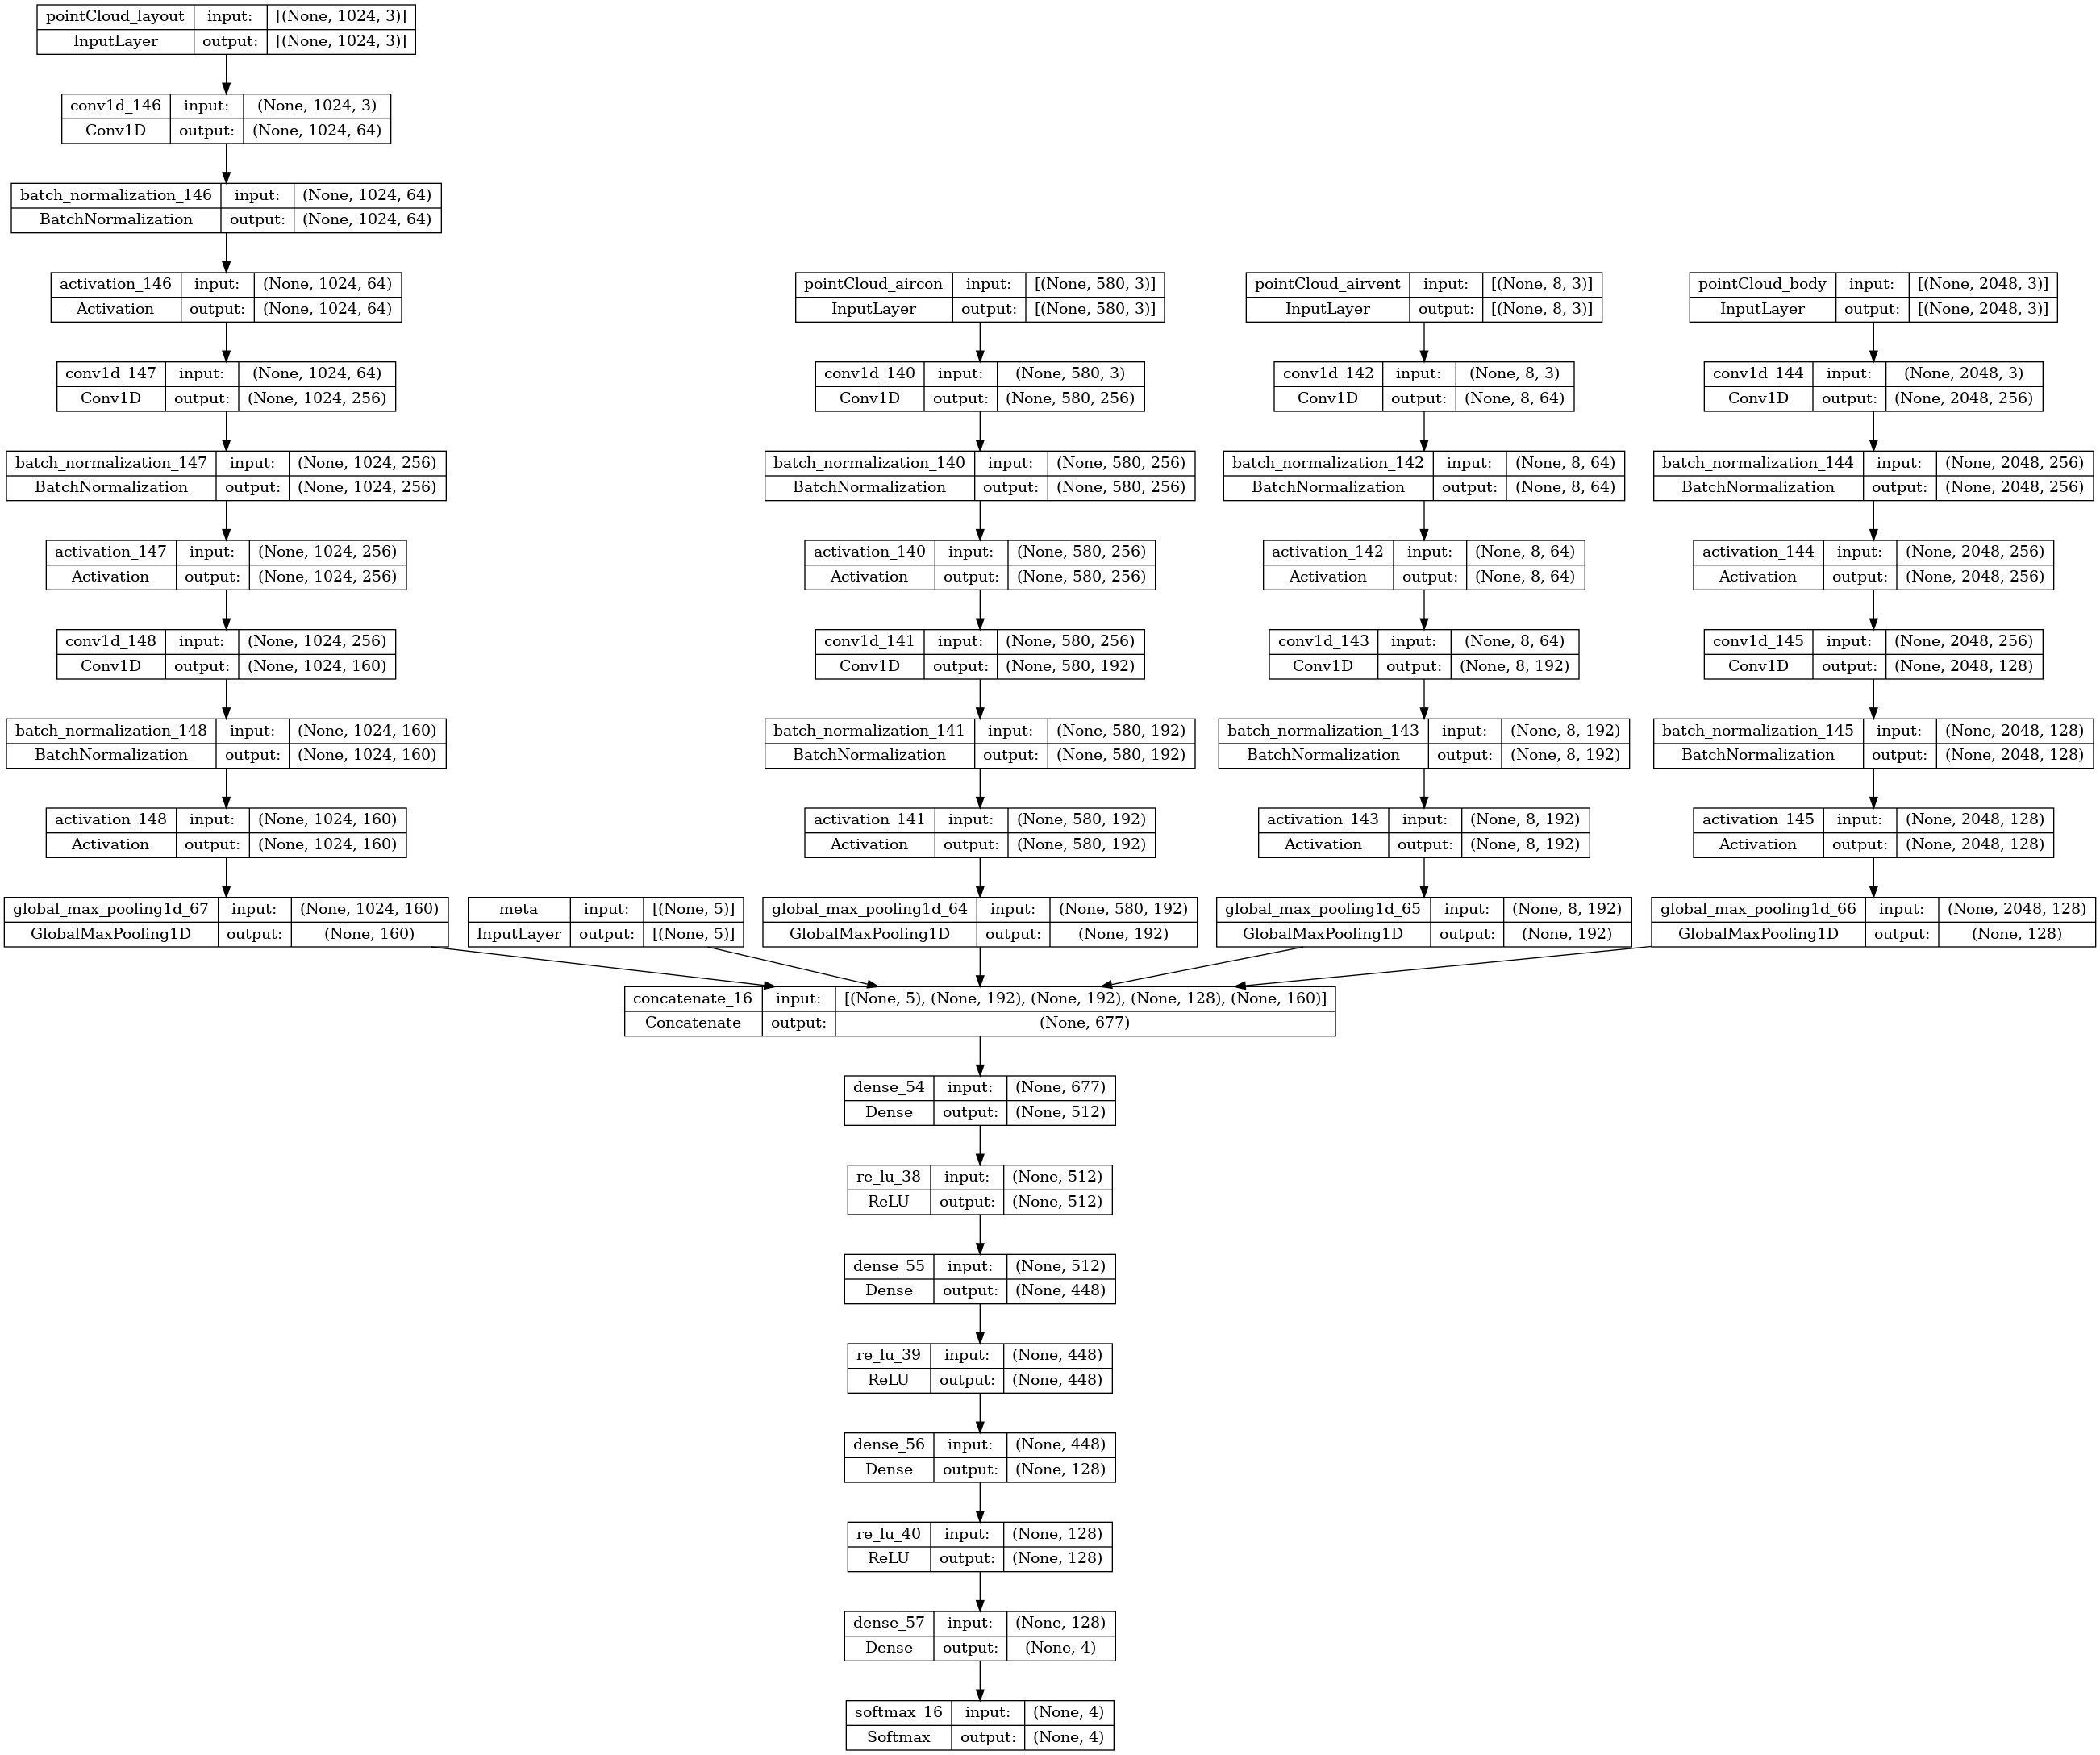

In [80]:
loaded_study = optuna.load_study(study_name='office10_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [81]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss (categorical_crossentropy)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    plt.show()

## チューニングの再現

In [82]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221229-001538
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud_aircon (InputLayer)  [(None, 580, 3)]    0           []                               
                                                                                                  
 conv1d_149 (Conv1D)            (None, 580, 64)      256         ['pointCloud_aircon[0][0]']      
                                                                                                  
 batch_normalization_149 (Batch  (None, 580, 64)     256         ['conv1d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activa

In [83]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221229-001538'

In [84]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [85]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 0.3660714225843549
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: 0.5
    filters_aircon-0: 64
    filters_aircon-1: 224
    filters_aircon-2: 160
    filters_airvent-0: 32
    filters_body-0: 128
    filters_body-1: 160
    filters_layout-0: 96
    lr: 0.005119095044042694
    units-0: 256
    units-1: 64
    units-2: 64
    units-3: 192


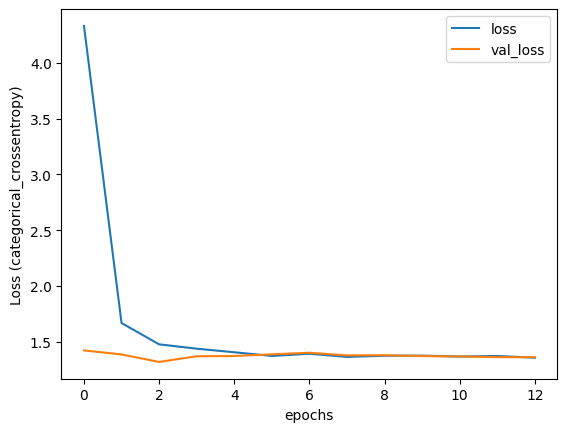

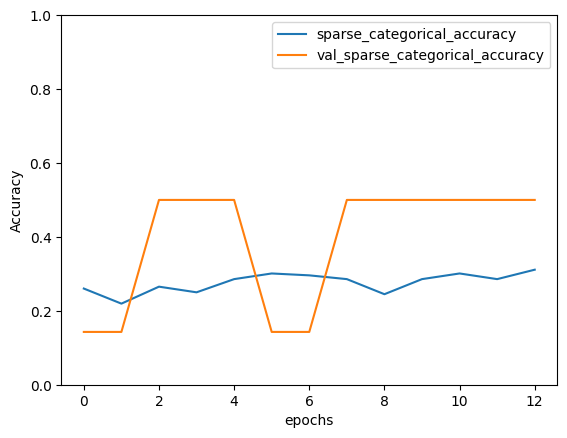

Best trial (test for office7):
  Value: 0.30792124941945076
  Params: 
    batch_size: 4
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 0
    filters_aircon-0: 256
    filters_aircon-1: 32
    filters_airvent-0: 96
    filters_airvent-1: 224
    filters_body-0: 32
    filters_body-1: 192
    filters_layout-0: 96
    filters_layout-1: 160
    filters_layout-2: 224
    lr: 0.06370601414052389


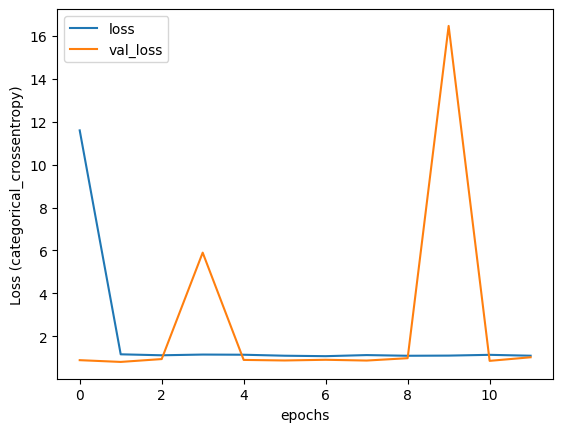

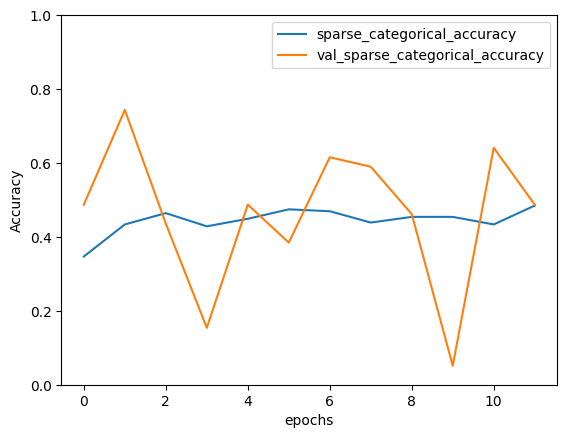

Best trial (test for office10):
  Value: 0.40842490270733833
  Params: 
    activation: ReLU
    batch_size: 1
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 3
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_airvent-0: 64
    filters_airvent-1: 192
    filters_body-0: 256
    filters_body-1: 128
    filters_layout-0: 64
    filters_layout-1: 256
    filters_layout-2: 160
    lr: 0.024171419822352682
    units-0: 512
    units-1: 448
    units-2: 128


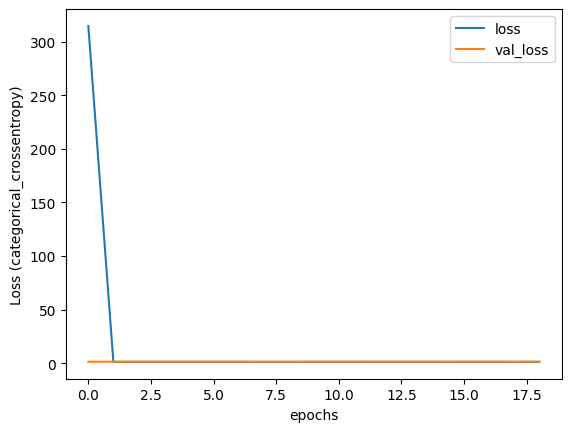

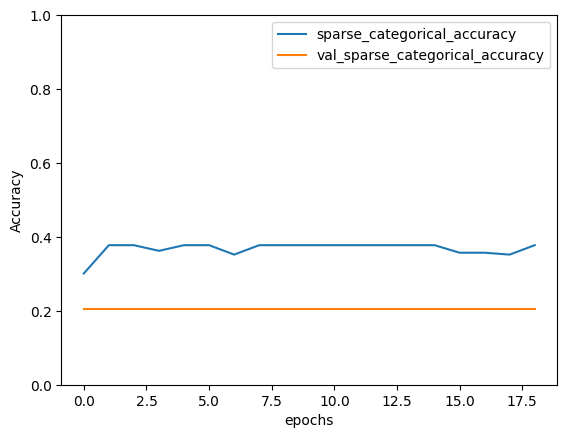

Best trial (test for office16):
  Value: 0.5107600763440132
  Params: 
    batch_size: 128
    conv_layers_aircon: 3
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 160
    filters_aircon-1: 224
    filters_aircon-2: 64
    filters_airvent-0: 160
    filters_airvent-1: 32
    filters_body-0: 64
    filters_body-1: 32
    filters_layout-0: 64
    filters_layout-1: 160
    lr: 1.4458420531559644e-05


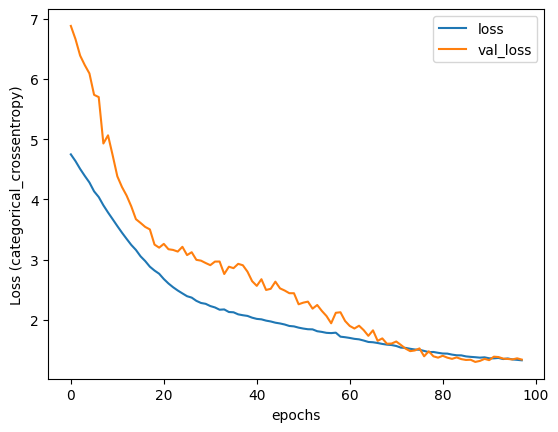

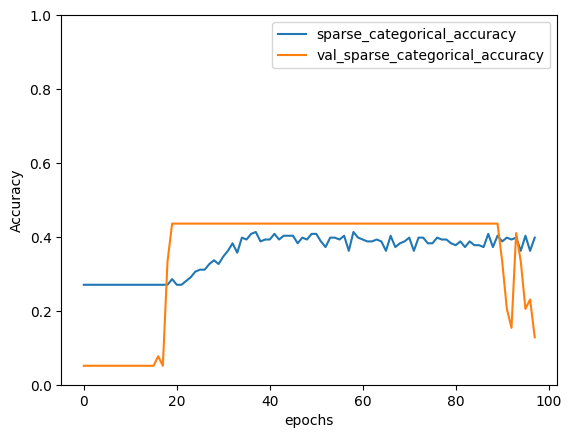

Best trial (test for office28):
  Value: 0.4750457890331745
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 3
    dropout: 0.5
    filters_aircon-0: 64
    filters_aircon-1: 32
    filters_airvent-0: 192
    filters_airvent-1: 160
    filters_body-0: 256
    filters_body-1: 32
    filters_body-2: 32
    filters_layout-0: 96
    filters_layout-1: 256
    lr: 1.7454101667717376e-05
    units-0: 256
    units-1: 192
    units-2: 448


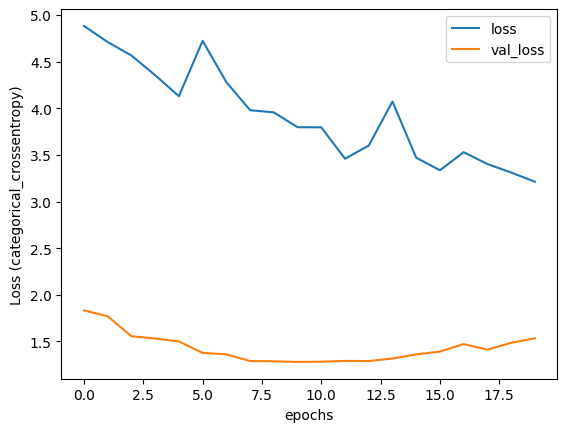

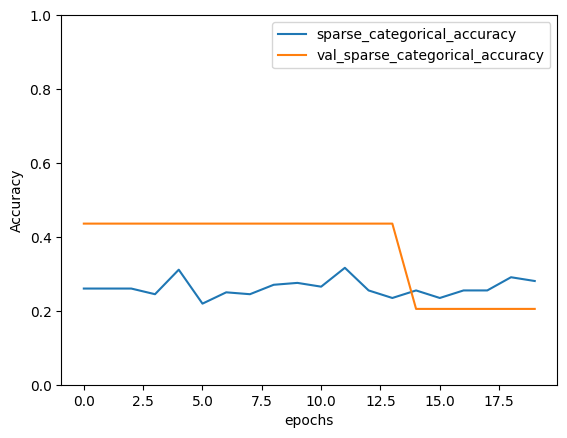

In [86]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [87]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
56/56 [==============================] - 4s 13ms/step - loss: 4.4494 - sparse_categorical_accuracy: 0.2545 - val_loss: 1.4432 - val_sparse_categorical_accuracy: 0.0513
Epoch 2/200
56/56 [==============================] - 0s 7ms/step - loss: 1.6153 - sparse_categorical_accuracy: 0.2277 - val_loss: 1.3915 - val_sparse_categorical_accuracy: 0.2051
Epoch 3/200
56/56 [==============================] - 0s 8ms/step - loss: 1.4836 - sparse_categorical_accuracy: 0.2723 - val_loss: 1.4087 - val_sparse_categorical_accuracy: 0.2051
Epoch 4/200
56/56 [==============================] - 0s 9ms/step - loss: 1.4822 - sparse_categorical_accuracy: 0.2545 - val_loss: 1.4058 - val_sparse_categorical_accuracy: 0.2051
Epoch 5/200
56/56 [==============================] - 0s 8ms/step - loss: 1.3804 - sparse_categorical_accuracy: 0.2857 - val_loss: 1.4201 - val_sparse_categorical_accuracy: 0.2051
Epoch 6/200
56/56 [==============================] - 0s 7ms/step - loss: 1.3763 - s

Best trial (test for office1):
  Value: 0.3660714225843549
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers_aircon: 3
    conv_layers_airvent: 1
    conv_layers_body: 2
    conv_layers_layout: 1
    dense_layers: 4
    dropout: 0.5
    filters_aircon-0: 64
    filters_aircon-1: 224
    filters_aircon-2: 160
    filters_airvent-0: 32
    filters_body-0: 128
    filters_body-1: 160
    filters_layout-0: 96
    lr: 0.005119095044042694
    units-0: 256
    units-1: 64
    units-2: 64
    units-3: 192


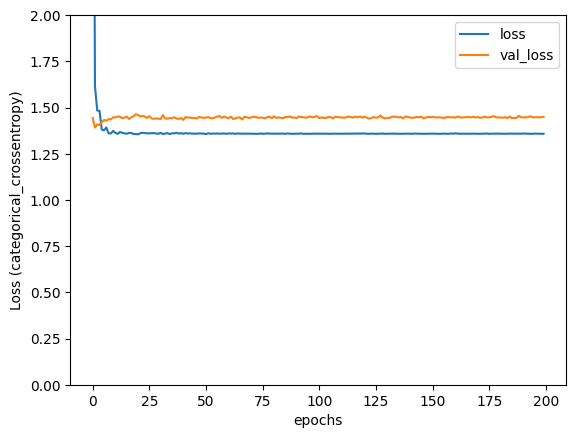

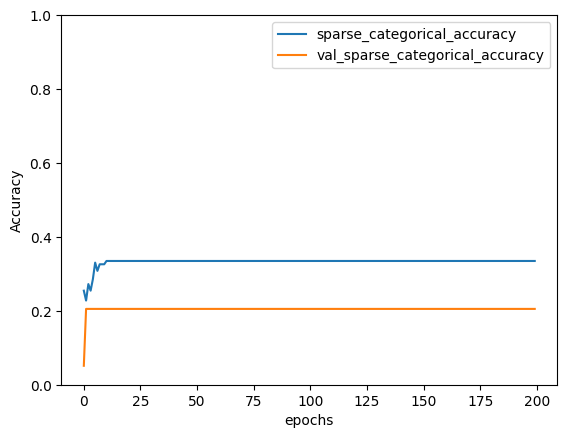

Best trial (test for office7):
  Value: 0.30792124941945076
  Params: 
    batch_size: 4
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 0
    filters_aircon-0: 256
    filters_aircon-1: 32
    filters_airvent-0: 96
    filters_airvent-1: 224
    filters_body-0: 32
    filters_body-1: 192
    filters_layout-0: 96
    filters_layout-1: 160
    filters_layout-2: 224
    lr: 0.06370601414052389


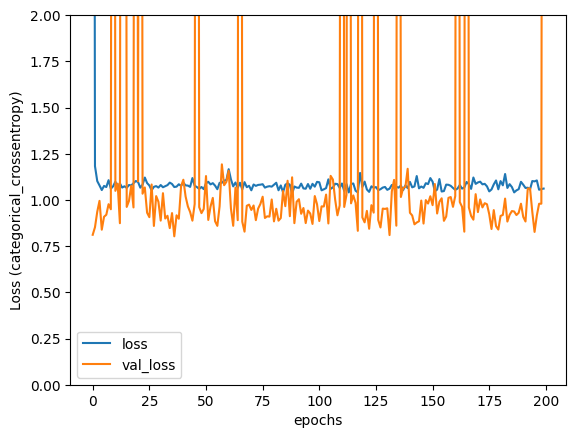

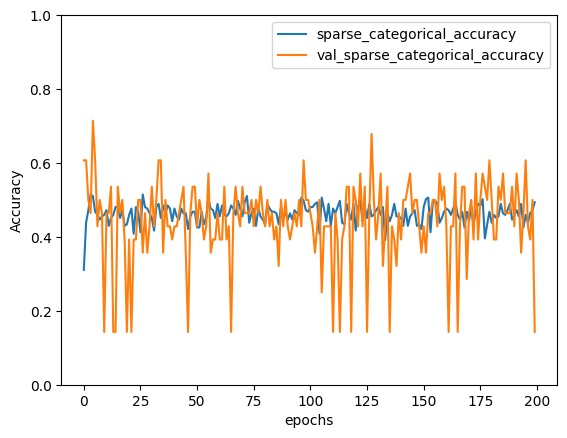

Best trial (test for office10):
  Value: 0.40842490270733833
  Params: 
    activation: ReLU
    batch_size: 1
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 3
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_airvent-0: 64
    filters_airvent-1: 192
    filters_body-0: 256
    filters_body-1: 128
    filters_layout-0: 64
    filters_layout-1: 256
    filters_layout-2: 160
    lr: 0.024171419822352682
    units-0: 512
    units-1: 448
    units-2: 128


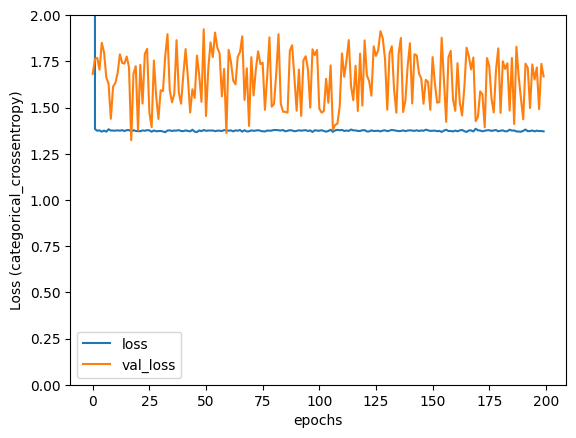

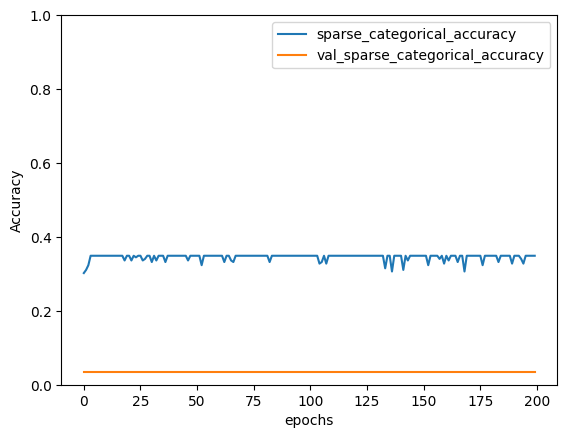

Best trial (test for office16):
  Value: 0.5107600763440132
  Params: 
    batch_size: 128
    conv_layers_aircon: 3
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 2
    dense_layers: 0
    filters_aircon-0: 160
    filters_aircon-1: 224
    filters_aircon-2: 64
    filters_airvent-0: 160
    filters_airvent-1: 32
    filters_body-0: 64
    filters_body-1: 32
    filters_layout-0: 64
    filters_layout-1: 160
    lr: 1.4458420531559644e-05


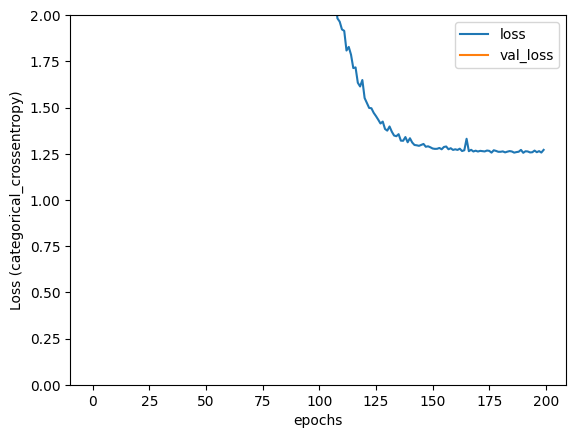

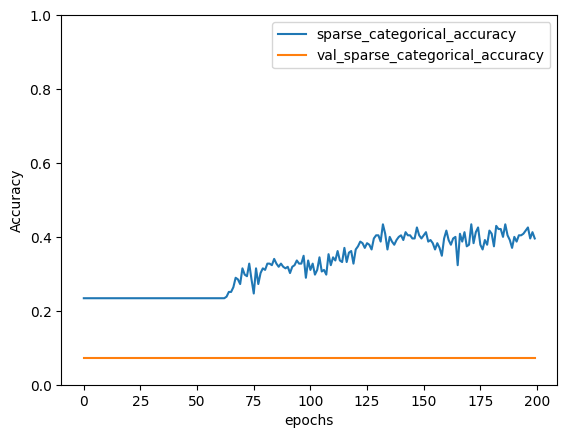

Best trial (test for office28):
  Value: 0.4750457890331745
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 3
    conv_layers_layout: 2
    dense_layers: 3
    dropout: 0.5
    filters_aircon-0: 64
    filters_aircon-1: 32
    filters_airvent-0: 192
    filters_airvent-1: 160
    filters_body-0: 256
    filters_body-1: 32
    filters_body-2: 32
    filters_layout-0: 96
    filters_layout-1: 256
    lr: 1.7454101667717376e-05
    units-0: 256
    units-1: 192
    units-2: 448


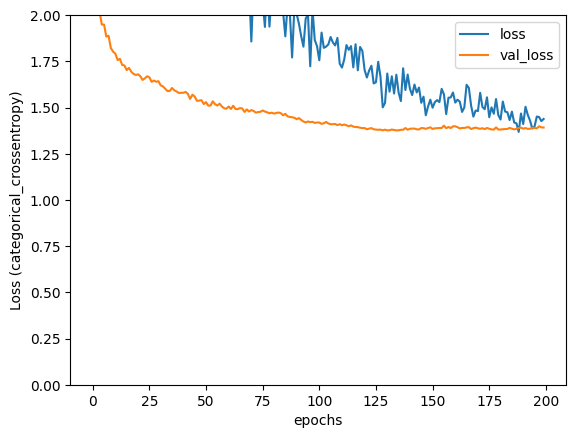

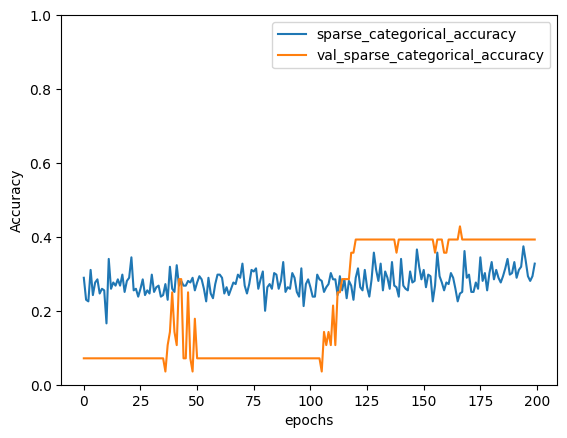

In [88]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

In [89]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20, restore_best_weights=True,)]
)



test_office: office10
Epoch 1/200
235/235 [==============================] - 4s 9ms/step - loss: 39.5228 - sparse_categorical_accuracy: 0.2894 - val_loss: 1.5140 - val_sparse_categorical_accuracy: 0.0357
Epoch 2/200
235/235 [==============================] - 2s 7ms/step - loss: 1.3913 - sparse_categorical_accuracy: 0.3191 - val_loss: 1.5530 - val_sparse_categorical_accuracy: 0.0357
Epoch 3/200
235/235 [==============================] - 2s 7ms/step - loss: 1.3739 - sparse_categorical_accuracy: 0.3234 - val_loss: 1.4856 - val_sparse_categorical_accuracy: 0.0357
Epoch 4/200
235/235 [==============================] - 2s 8ms/step - loss: 1.3761 - sparse_categorical_accuracy: 0.3489 - val_loss: 1.4443 - val_sparse_categorical_accuracy: 0.0357
Epoch 5/200
235/235 [==============================] - 2s 8ms/step - loss: 1.3695 - sparse_categorical_accuracy: 0.3489 - val_loss: 1.5568 - val_sparse_categorical_accuracy: 0.0357
Epoch 6/200
235/235 [==============================] - 2s 7ms/step - los

  Value: 0.40842490270733833
  Params: 
    activation: ReLU
    batch_size: 1
    conv_layers_aircon: 2
    conv_layers_airvent: 2
    conv_layers_body: 2
    conv_layers_layout: 3
    dense_layers: 3
    dropout: None
    filters_aircon-0: 256
    filters_aircon-1: 192
    filters_airvent-0: 64
    filters_airvent-1: 192
    filters_body-0: 256
    filters_body-1: 128
    filters_layout-0: 64
    filters_layout-1: 256
    filters_layout-2: 160
    lr: 0.024171419822352682
    units-0: 512
    units-1: 448
    units-2: 128


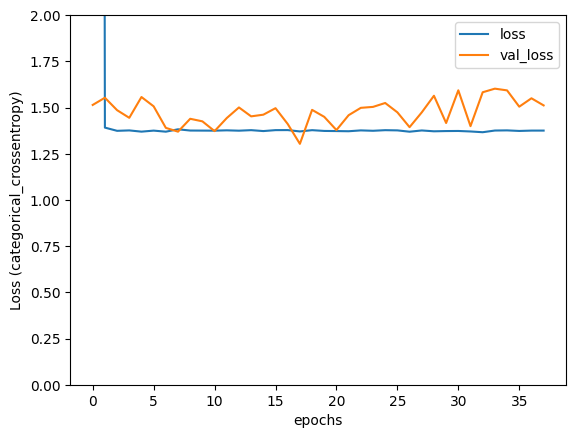

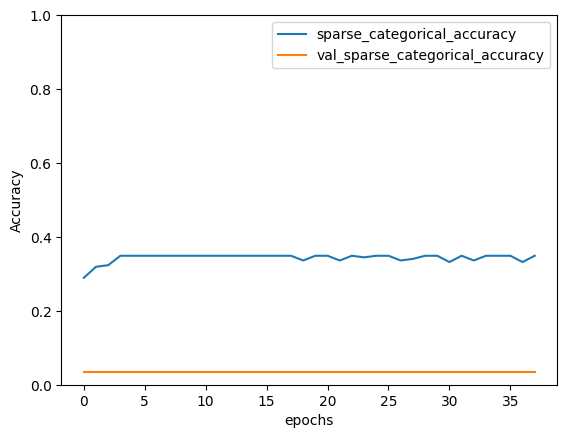

In [90]:
print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=2.)

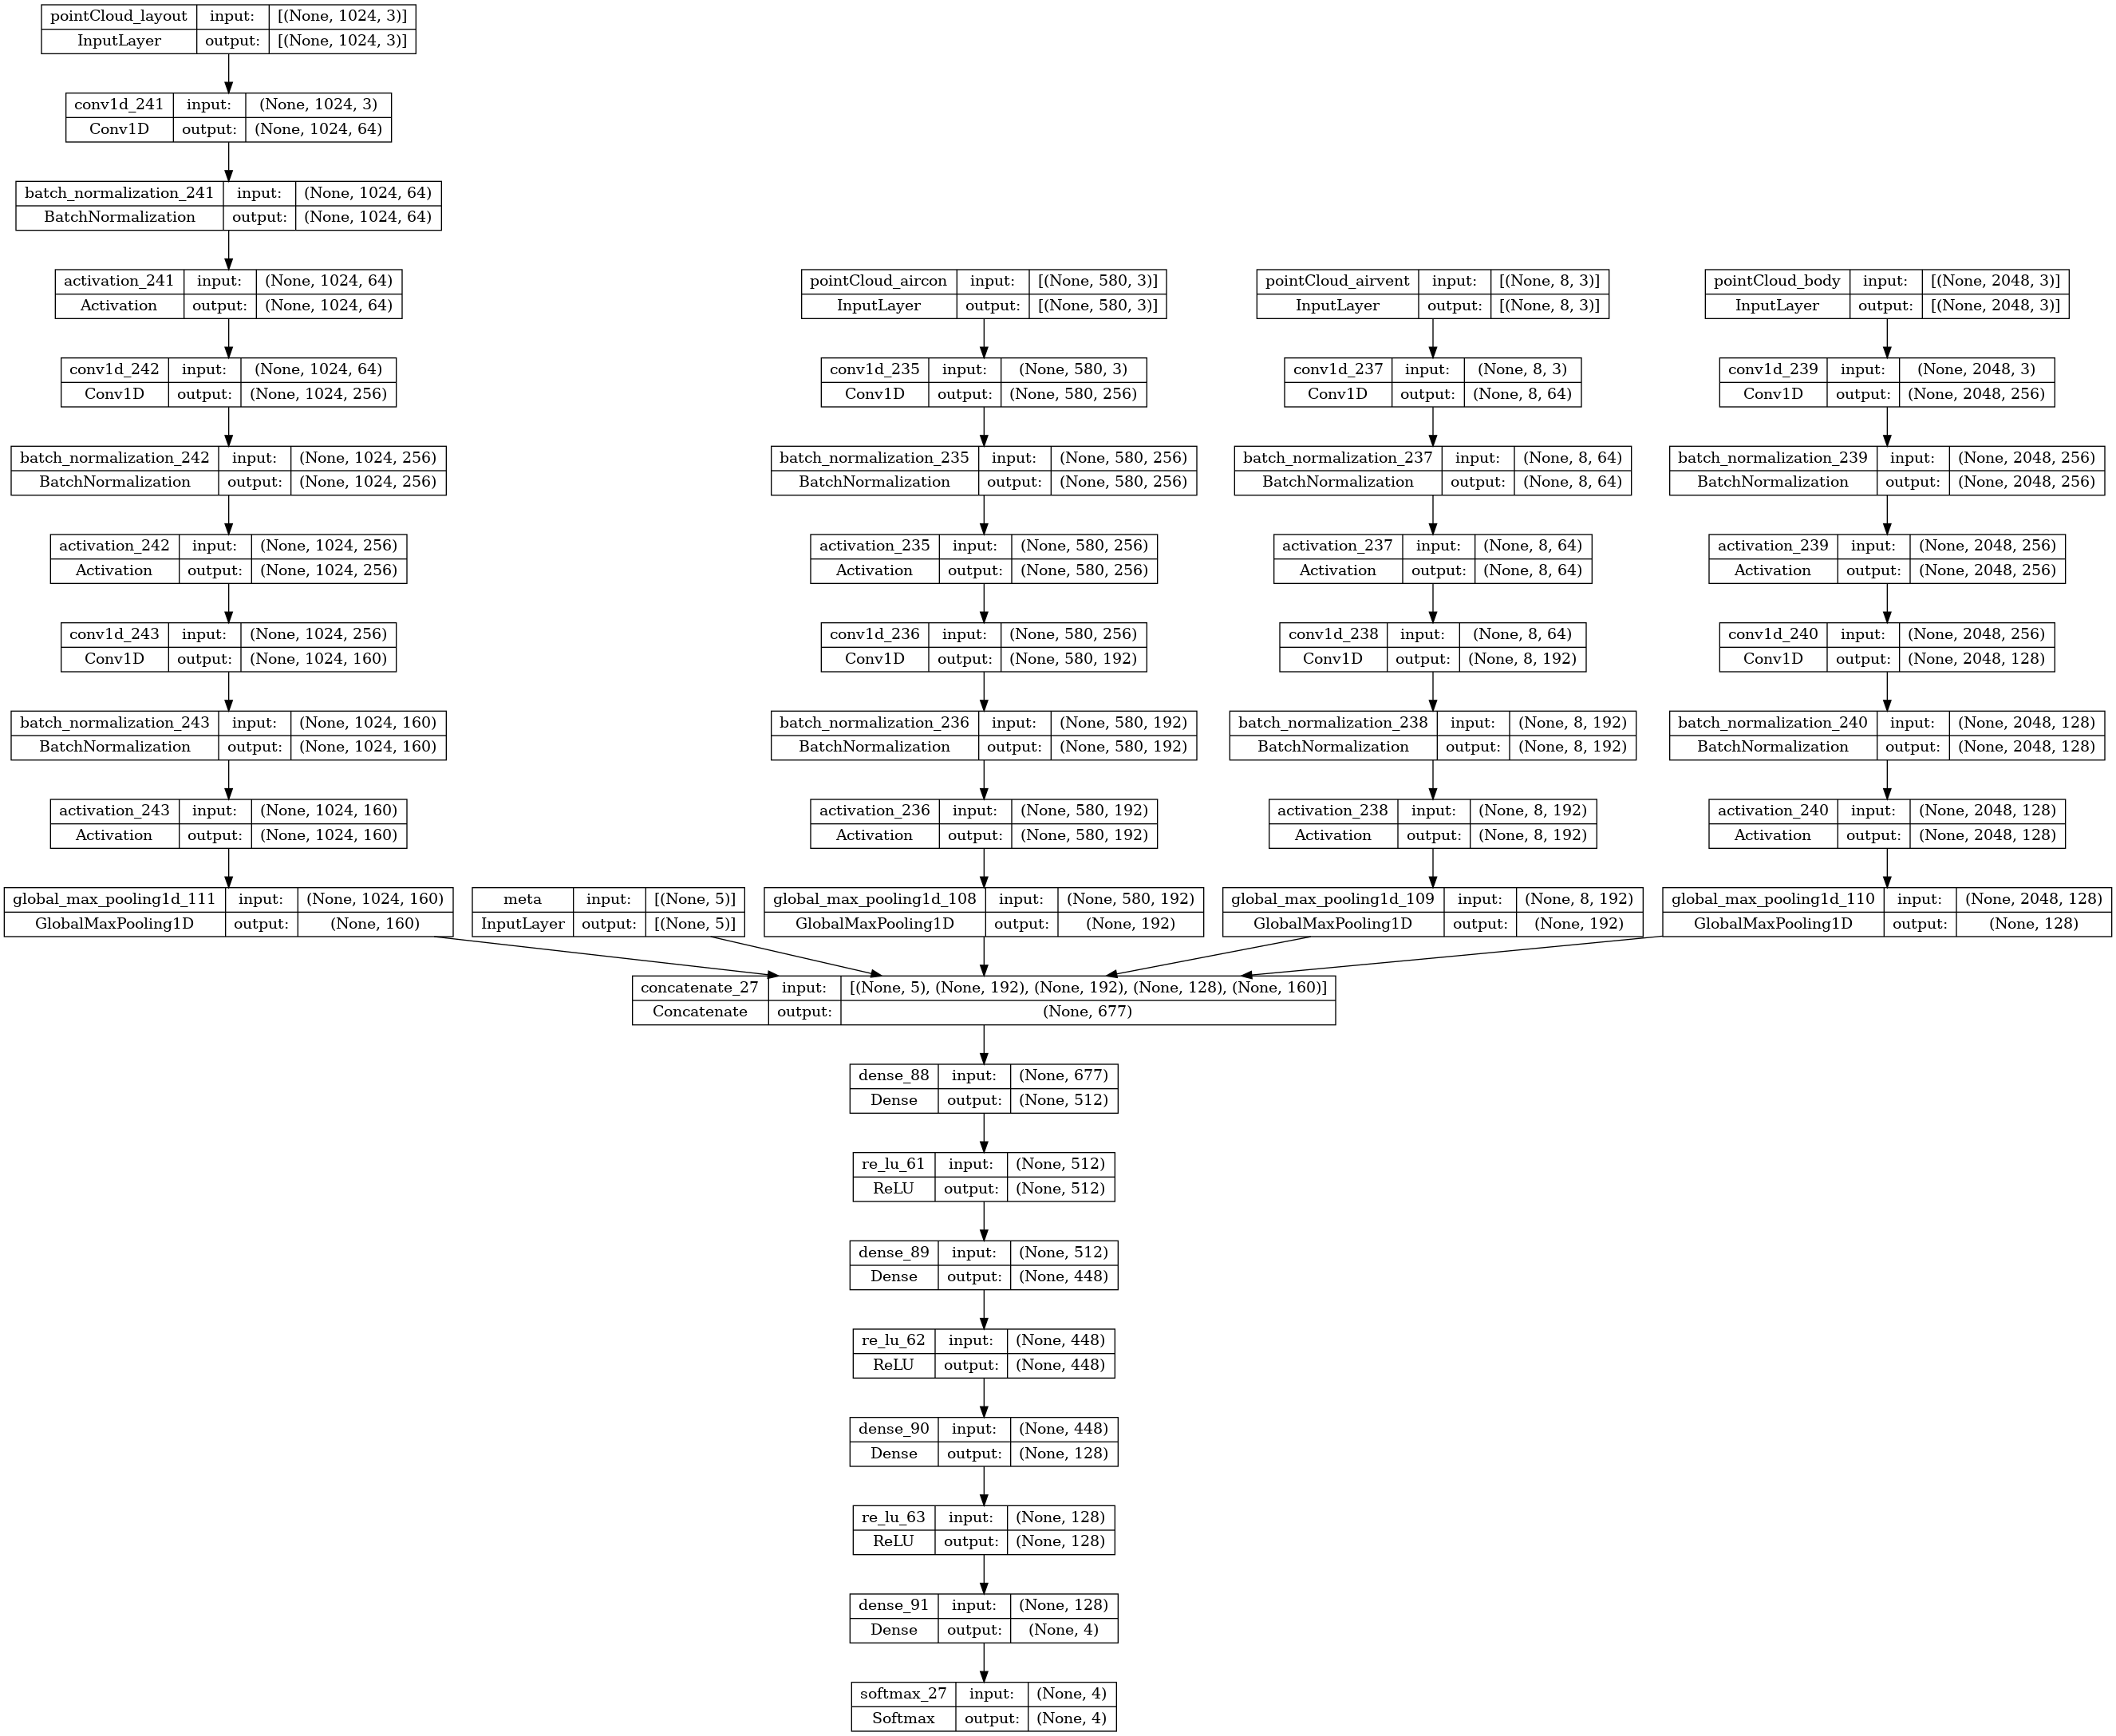

In [91]:
keras.utils.plot_model(best_model, show_shapes=True)

In [92]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 22ms/step


In [93]:
y_fit_pred = y_fit_pred_softmax.argmax(axis=1)
y_test_pred = y_test_pred_softmax.argmax(axis=1)

In [94]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
case_name,,,
office10_0_0,2,1,False
office10_0_164_aout,3,1,False
office10_0_164_bout,2,1,False
office10_0_246_aout,3,1,False
office10_0_246_bout,3,1,False
office10_0_82_aout,3,1,False
office10_0_82_bout,2,1,False
office10_360_0,0,1,False
office10_360_164_aout,0,1,False


In [95]:
from sklearn.metrics import accuracy_score

print("train_acc: ", accuracy_score(y_fit, y_fit_pred))
print("test_acc: ", accuracy_score(y_test, y_test_pred))

train_acc:  0.34893617021276596
test_acc:  0.03571428571428571


<AxesSubplot:>

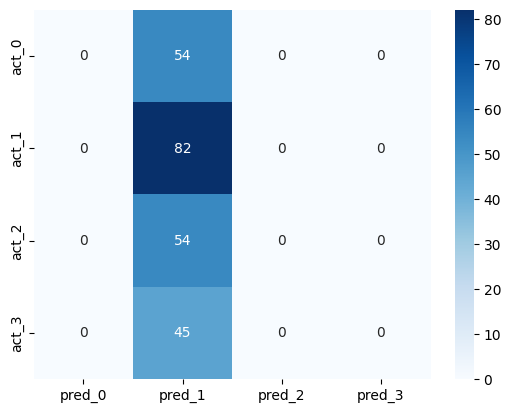

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_fit, y_fit_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Blues')

<AxesSubplot:>

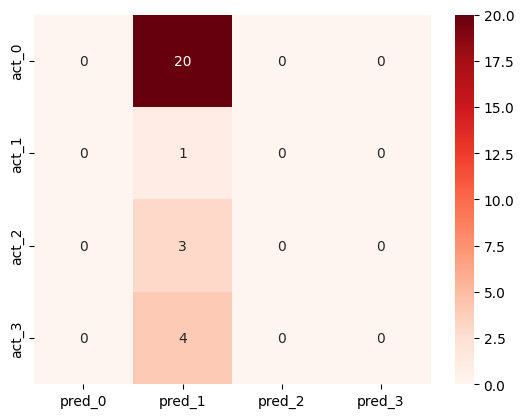

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Reds')

In [343]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [344]:
y_fit.to_numpy().shape

(140,)

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [85]:
df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [94]:
def plot_RoI_level(classification_level):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = np.unique(office_list)
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

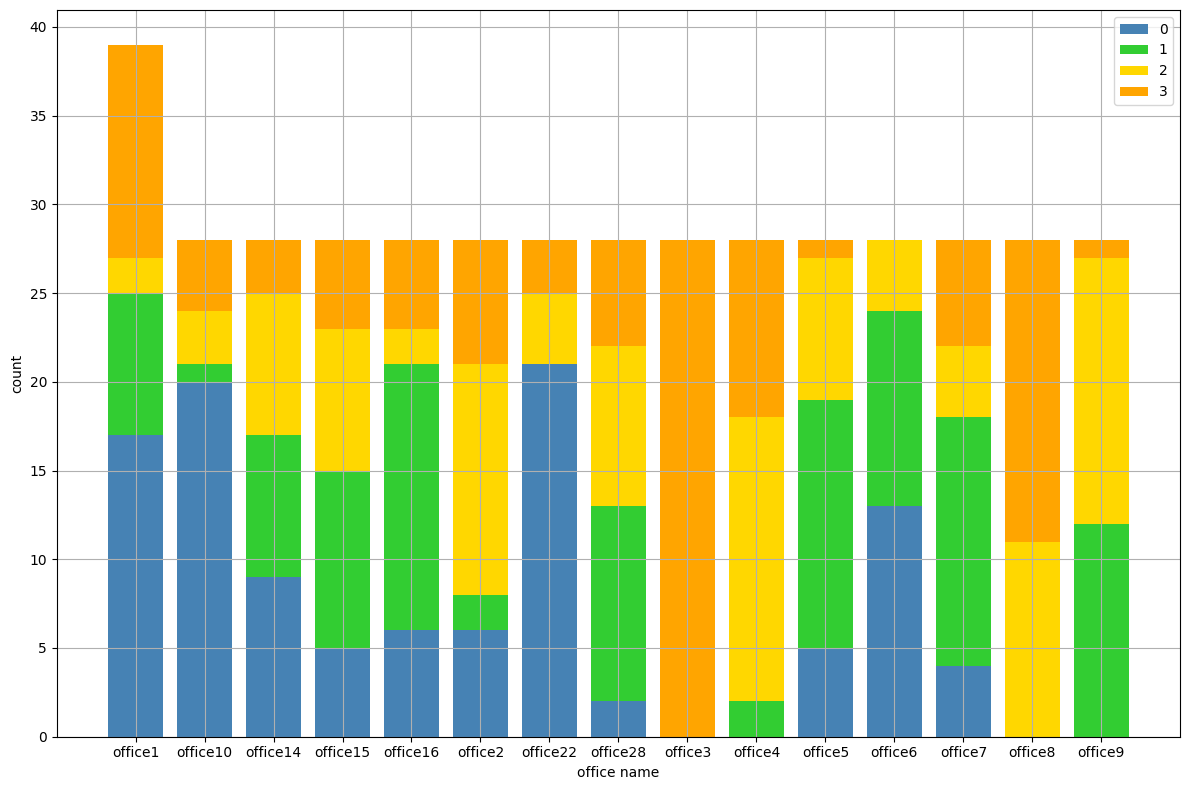

In [95]:
plot_RoI_level(4)

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()